In [1]:
from os import getcwd
from os.path import join

from IPython.display import HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.cluster import KMeans
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
cwd = getcwd()
data_dir = join(cwd, 'dataset')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
dataset_base = join(data_dir, 'DATASET_BASE_1990.csv')
emissions_base_df = pd.read_csv(dataset_base)

with open('emissions_base.html', mode='w', encoding='utf8') as file_object:
    file_object.write(emissions_base_df.loc[:, 'CF4':'C5F8'].to_html())

HTML(emissions_base_df.to_html())

In [5]:
emissions_base_df['CO2']

0       352,617.358
1       332,949.063
2       138,687.864
3       106,336.324
4        11,587.266
5        20,764.274
6        53,367.609
7         4,773.225
8         2,960.868
9        16,468.899
10        2,689.561
11        4,347.932
12              NaN
13          442.157
14              NaN
15        7,894.815
16              NaN
17          408.037
18              NaN
19       13,382.115
20      110,279.032
21        5,498.660
22       99,489.794
23        1,593.101
24        3,697.477
25              NaN
26       30,614.557
27        4,357.440
28       19,905.333
29        6,351.784
30       19,668.295
31           90.758
32           90.758
33           86.434
34            4.324
35              NaN
36       19,577.537
37       17,359.133
38        5,988.392
39       11,321.654
40           49.087
41        2,218.404
42        2,000.269
43          215.328
44            2.807
45       44,482.928
46       23,747.326
47       13,670.975
48        2,383.157
49          445.214


In [6]:
ghg_file_path = join(data_dir, 'DATASET_GHG_EMISSIONS.csv')
co2_file_path = join(data_dir, 'DATASET_CO2_EMISSIONS.csv')
ch4_file_path = join(data_dir, 'DATASET_CH4_EMISSIONS.csv')
n2o_file_path = join(data_dir, 'DATASET_n2o_EMISSIONS.csv')

ghg_df = pd.read_csv(ghg_file_path)
co2_df = pd.read_csv(co2_file_path)
ch4_df = pd.read_csv(ch4_file_path)
n2o_df = pd.read_csv(n2o_file_path)

co2_df = co2_df.fillna(0)
ch4_df = ch4_df.fillna(0)
n2o_df = n2o_df.fillna(0)

In [7]:
ghg_df.dtypes

Year      int64
CO2     float64
CH4     float64
N2O     float64
dtype: object

In [8]:
with open('ghg_df.html', mode='w', encoding='utf8') as file_object:
    file_object.write(ghg_df.to_html())
ghg_df

Year          CO2          CH4          N2O
0   1990  319999.8455  117840.4201  28337.97300
1   1991  329716.3529  119392.8666  27177.03342
2   1992  333049.7117  117998.4615  27988.13134
3   1993  338075.1071  118275.3551  26219.01096
4   1994  360853.3477  124026.1810  28335.69607
5   1995  347496.6454  127038.4565  28258.99299
6   1996  359553.2713  131254.5972  27629.11144
7   1997  375317.2362  138365.1189  29935.23041
8   1998  393944.4869  143331.7863  30056.78095
9   1999  386967.0070  136486.7789  31511.02751
10  2000  195440.7052  139956.6732  31982.24292
11  2001  197460.6948  140413.0782  31193.86759
12  2002  229882.0081  143348.7196  31902.01696
13  2003  224329.1181  145781.6545  32541.26374
14  2004  238241.8115  144473.8109  34071.64722
15  2005  253144.3784  147152.5841  32198.64008
16  2006  262024.9060  151651.1667  31918.17033
17  2007  289366.1235  161204.3271  33870.67012
18  2008  313910.9347  180349.0479  35691.53692
19  2009  320049.4219  177993.3143  34340.82064
20  2010  310682.7739  168300.2494  40108.01820
21  2011  331790.5137  168480.1622  40920.94778
22  2012  325051.5099  160183.7344  38281.43950
23  2013  324012.1925  163464.8722  45831.02824
24  2014  326893.5366  168613.8559  40075.08424
25  2015  323593.4472  168025.6552  42953.34904
26  2016  370858.7480  174362.9978  36897.13813
27  2017  323275.7644  170958.5418  38627.52932
28  2018  332067.7856  173705.9119  42778.19674
29  2019  295777.9360  175558.4682  41190.82233

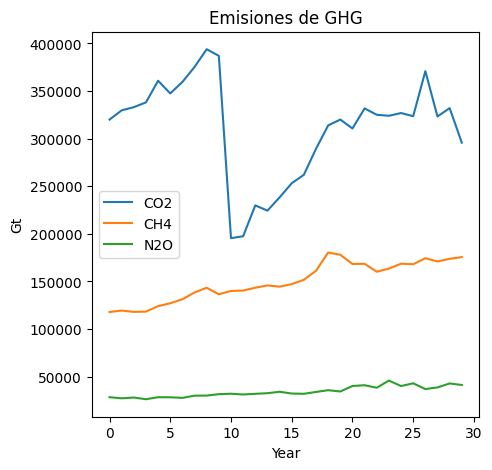

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(ghg_df['CO2'], label="CO2")
ax.plot(ghg_df['CH4'], label="CH4")
ax.plot(ghg_df['N2O'], label="N2O")
ax.set_xlabel('Year')
ax.set_ylabel('Gt')
ax.set_title('Emisiones de GHG')
ax.legend()

In [10]:
dfs = [co2_df, ch4_df, n2o_df]

In [11]:
co2_df["[2B9] Producción fluoroquímica"] = dfs[0]["[2B9] Producción fluoroquímica"].fillna(0)
co2_df["[2B9] Producción fluoroquímica"].dtype == 'O'

True

In [12]:
for df in dfs:
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].replace(' ', 0);
        if df[col].mean() < 1:
            df.drop(columns=col)
        else:
            print(f"Passed {col}")

Passed Year
Passed [1] Energía
Passed [1A] Actividades de quema del combustible
Passed [1A1] Industrias de la energía
Passed [1A1a] Actividad principal producción de electricidad y calor
Passed [1A1b] Refinación del petróleo
Passed [1A1c] Manufactura de combustibles sólidos y otras industrias de la energía
Passed [1A2] Industrias manufactura y de la construcción
Passed [1A2a] Hierro y acero
Passed [1A2b] Metales no ferrosos
Passed [1A2c] Sustancias químicas
Passed [1A2d] Pulpa, papel e imprenta
Passed [1A2e] Procesamiento de alimentos, bebidas y tabaco
Passed [1A2g] Equipo de transporte
Passed [1A2i] Minería (con excepción de combustibles) y cantería
Passed [1A2k] Construcción
Passed [1A2m] Industria no especificada
Passed [1A3] Transporte
Passed [1A3a] Aviación civil
Passed [1A3b] Autotransporte
Passed [1A3c] Ferrocarriles
Passed [1A3d] Navegación marítima y fluvial
Passed [1A4] Otros sectores
Passed [1A4a] Comercial/institucional
Passed [1A4b] Residencial
Passed [1A4c] Agropecuario/s

In [13]:
HTML(co2_df.to_html())

In [14]:
co2_df.columns, len(co2_df.columns), co2_df.index

(Index(['Year', '[1] Energía', '[1A] Actividades de quema del combustible',
        '[1A1] Industrias de la energía',
        '[1A1a] Actividad principal producción de electricidad y calor',
        '[1A1b] Refinación del petróleo',
        '[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía',
        '[1A2] Industrias manufactura y de la construcción',
        '[1A2a] Hierro y acero', '[1A2b] Metales no ferrosos',
        ...
        '[4A3] Tiraderos a cielo abierto para eliminación de residuos',
        '[4B] Tratamiento biológico de los residuos sólidos',
        '[4C] Incineración y quema a cielo abierto  de residuos',
        '[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso',
        '[4C2] Quema a cielo abierto de residuos sólidos',
        '[4D] Tratamiento y eliminación de aguas residuales',
        '[4D1] Tratamiento y eliminación de aguas residuales municipales',
        '[4D2] Tratamiento y eliminación de aguas residuale

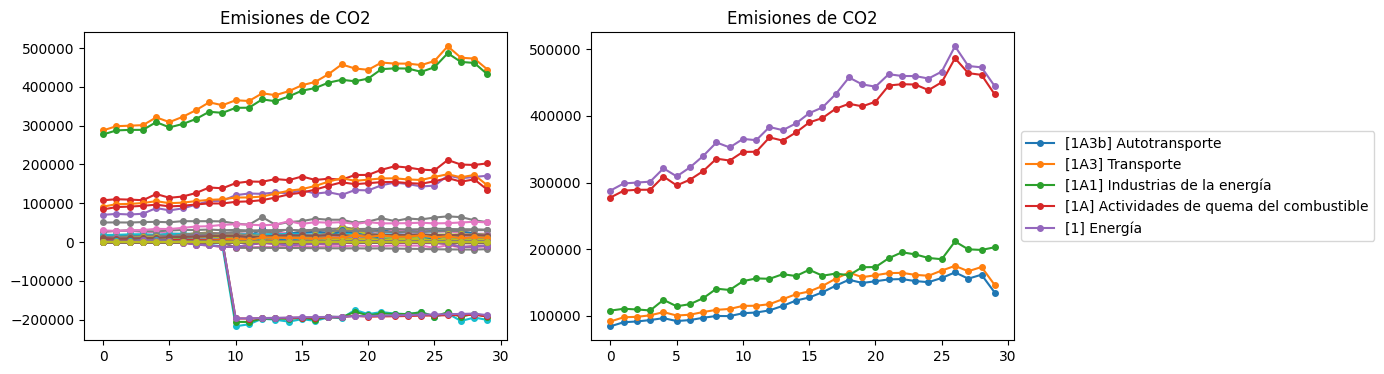

In [15]:
df = co2_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

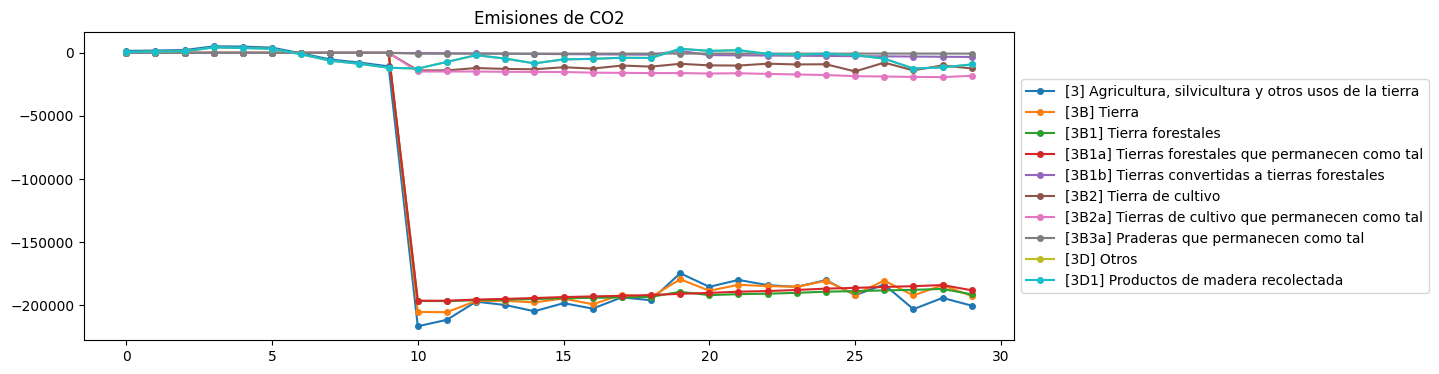

In [16]:
df = co2_df
cols = (df < 0).any()
cols = df.columns[cols]

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax.plot(df[col], 'o', ls='-', ms=4, label=col)
        ax.set_title(f'Emisiones de CO2')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [17]:
HTML(ch4_df.to_html())

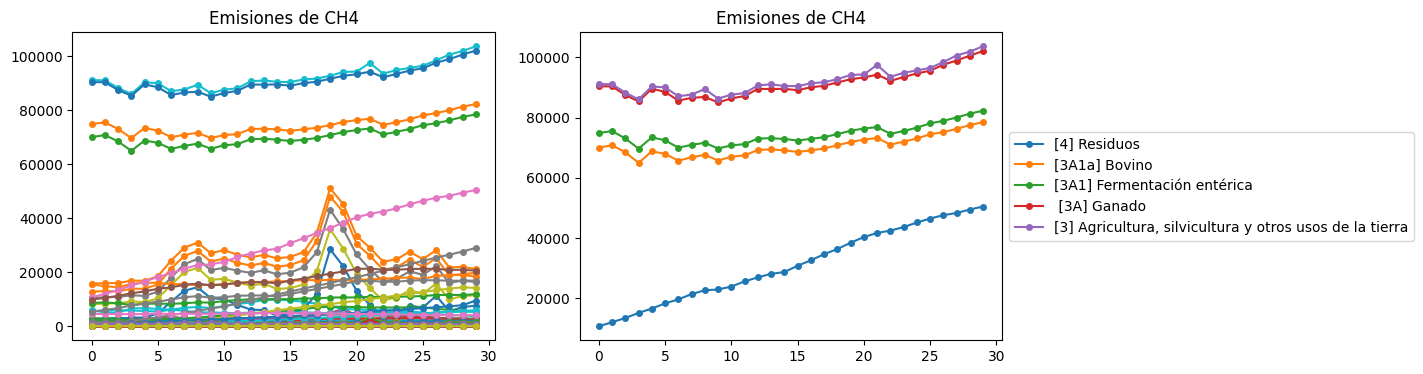

In [18]:
# df = ch4_df
# cols = df.columns
# fig, ax = plt.subplots(figsize=(6, 6))
# for col in df.columns:
#     if col != "Total":
#         ax.plot(df[col], 'o', ls='-', ms=4,)
#         ax.set_title(f'Emisiones de CH4')
df = ch4_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CH4')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CH4')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
HTML(n2o_df.to_html())

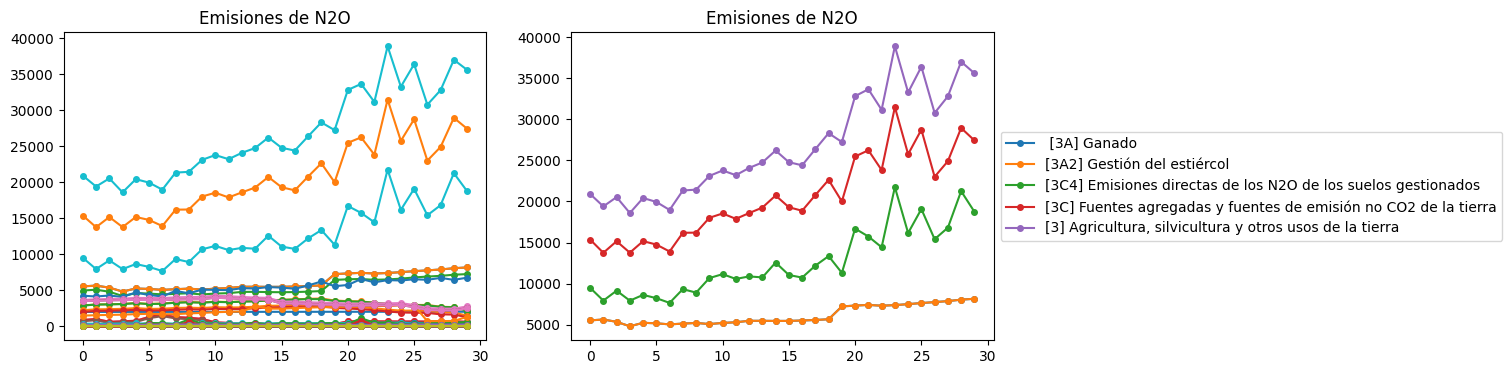

In [20]:
df = n2o_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de N2O')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de N2O')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
co2_df_zeros = co2_df.copy()
co2_df_absolute = co2_df.copy()
ex = (co2_df < 0)
co2_df_zeros[ex] = 0
co2_df_absolute[ex] = co2_df_absolute[ex].abs()
co2_df.columns[ex.any() == True]

Index(['[3] Agricultura, silvicultura y otros usos de la tierra',
       '[3B] Tierra', '[3B1] Tierra forestales',
       '[3B1a] Tierras forestales que permanecen como tal',
       '[3B1b] Tierras convertidas a tierras forestales',
       '[3B2] Tierra de cultivo',
       '[3B2a] Tierras de cultivo que permanecen como tal',
       '[3B3a] Praderas que permanecen como tal', '[3D] Otros',
       '[3D1] Productos de madera recolectada'],
      dtype='object')

In [22]:
co2_df_zeros = co2_df_zeros.drop(columns='Total')
co2_df_zeros.loc[:, 'Total'] = co2_df_zeros[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
HTML(co2_df_zeros.to_html())

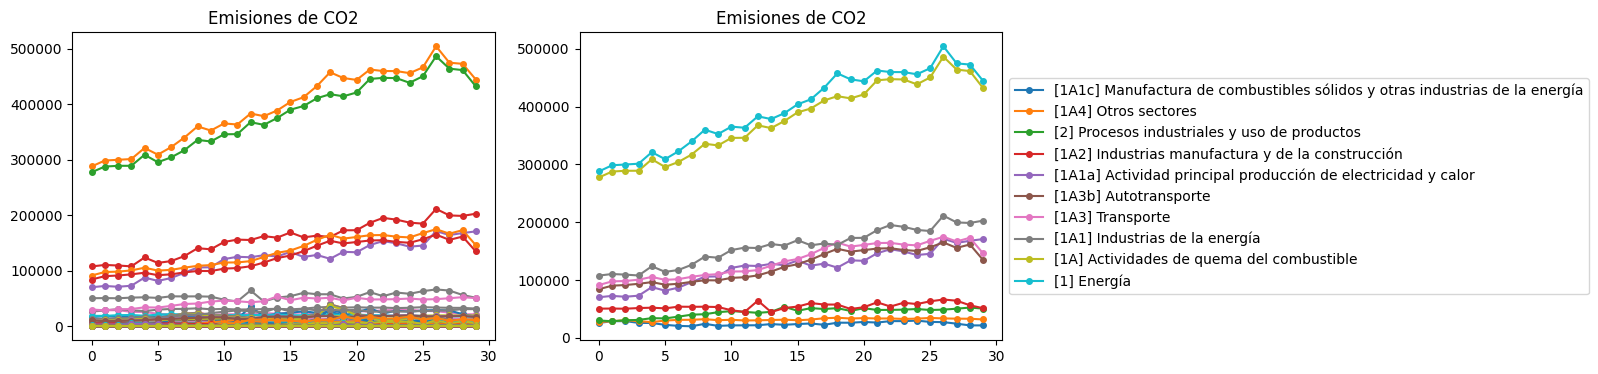

In [23]:
df = co2_df_zeros
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-10:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [24]:
co2_df_absolute = co2_df_absolute.drop(columns='Total')
co2_df_absolute.loc[:, 'Total'] = co2_df_absolute[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
HTML(co2_df_absolute.to_html())

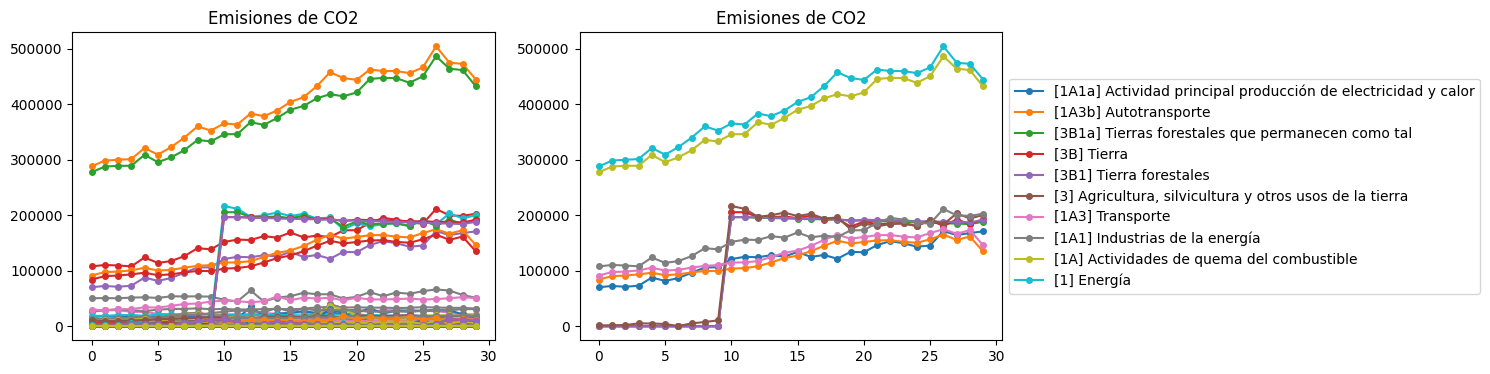

In [25]:
df = co2_df_absolute
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-10:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [26]:
ghg_df = pd.DataFrame()
ghg_df.loc[:, 'Total_CO2'] = co2_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_CH4'] = ch4_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_N2O'] = n2o_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_CO2_cero'] = co2_df_zeros['Total']
ghg_df.loc[:, 'Total_CO2_abs'] = co2_df_absolute['Total']

In [27]:
ghg_df

Total_CO2      Total_CH4     Total_N2O  Total_CO2_cero  Total_CO2_abs
0   319999.845435  117840.420107  28337.973001   319999.845435  319999.845435
1   329716.352941  119392.866648  27177.033418   329716.352941  329716.352941
2   333049.711791  117998.461475  27988.131344   333049.711791  333049.711791
3   338075.107079  118275.355124  26219.010955   338075.107079  338075.107079
4   360853.347739  124026.181048  28335.696073   360853.347739  360853.347739
5   347496.645328  127038.456512  28258.992991   347496.645328  347496.645328
6   359553.271340  131254.597197  27629.111445   359916.255860  360279.240381
7   375317.236119  138365.118857  29935.230411   380543.586699  385769.937279
8   393944.486939  143331.786281  30056.780952   401618.538463  409292.589987
9   386967.007008  136486.778871  31511.027508   397644.952468  408322.897928
10  195440.705173  139956.673235  31982.242925   412217.772273  628994.839373
11  197460.694775  140413.078156  31193.867589   409097.463975  620734.233175
12  229882.008138  143348.719565  31902.016964   427134.515138  624387.022138
13  224329.118027  145781.654480  32541.263749   424249.555727  624169.993427
14  238241.811580  144473.810899  34071.647219   443097.449880  647953.088180
15  253144.378355  147152.584063  32198.640081   451599.230655  650054.082955
16  262024.905931  151651.166704  31918.170335   464766.329631  667507.753331
17  289366.123458  161204.327149  33870.670127   483238.262758  677110.402058
18  313910.934715  180349.047921  35691.536925   510038.495915  706166.057115
19  320049.421854  177993.314317  34340.820636   494768.322654  669487.223454
20  310682.773857  168300.249424  40108.018199   496179.422557  681676.071257
21  331790.513625  168480.162232  40920.947782   511809.413825  691828.314025
22  325051.509968  160183.734405  38281.439496   509205.695668  693359.881368
23  324012.192497  163464.872232  45831.028247   509557.512997  695102.833497
24  326893.536555  168613.855887  40075.084242   507026.932055  687160.327555
25  323593.447247  168025.655222  42953.349043   515764.602647  707935.758047
26  370858.747953  174362.997827  36897.138128   554532.139953  738205.531953
27  323275.764441  170958.541815  38627.529313   526498.496741  729721.229041
28  332067.785543  173705.911931  42778.196744   526353.940143  720640.094743
29  295777.935996  175558.468129  41190.822333   496186.858596  696595.781196

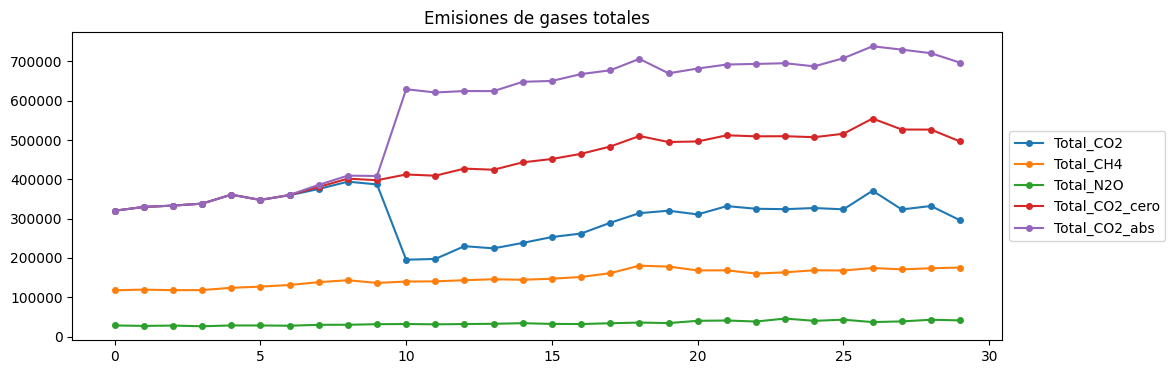

In [28]:
df = ghg_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for col in cols:
    ax.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax.set_title(f'Emisiones de gases totales')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [29]:
index = pd.date_range(start="1990", end="2020", freq="A-DEC")

ghg_total_co2_arr = ghg_df['Total_CO2'].to_numpy()
ghg_total_ch4_arr = ghg_df['Total_CH4'].to_numpy()
ghg_total_n2o_arr = ghg_df['Total_N2O'].to_numpy()
ghg_total_co2_zero_arr = ghg_df['Total_CO2_cero'].to_numpy()
ghg_total_co2_abs_arr = ghg_df['Total_CO2_abs'].to_numpy()

co2_ts = pd.Series(ghg_total_co2_arr, index)
ch4_ts = pd.Series(ghg_total_ch4_arr, index)
n2o_ts = pd.Series(ghg_total_n2o_arr, index)
co2_cero_ts = pd.Series(ghg_total_co2_zero_arr, index)
co2_abs_ts = pd.Series(ghg_total_co2_abs_arr, index)

# Suavizado Exponencial Simple

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


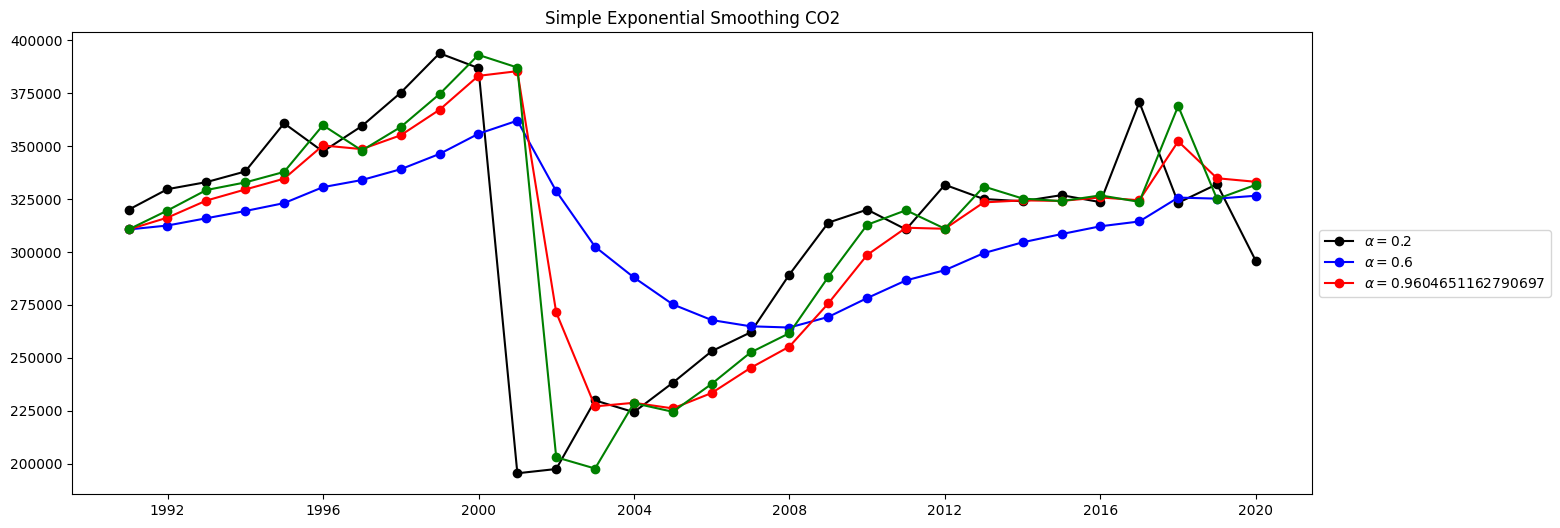

In [30]:
ts = co2_ts

fit1 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.2, optimized=False
)

fit2 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.6, optimized=False
)

fit3 = SimpleExpSmoothing(ts, initialization_method='estimated').fit()

fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CO2")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

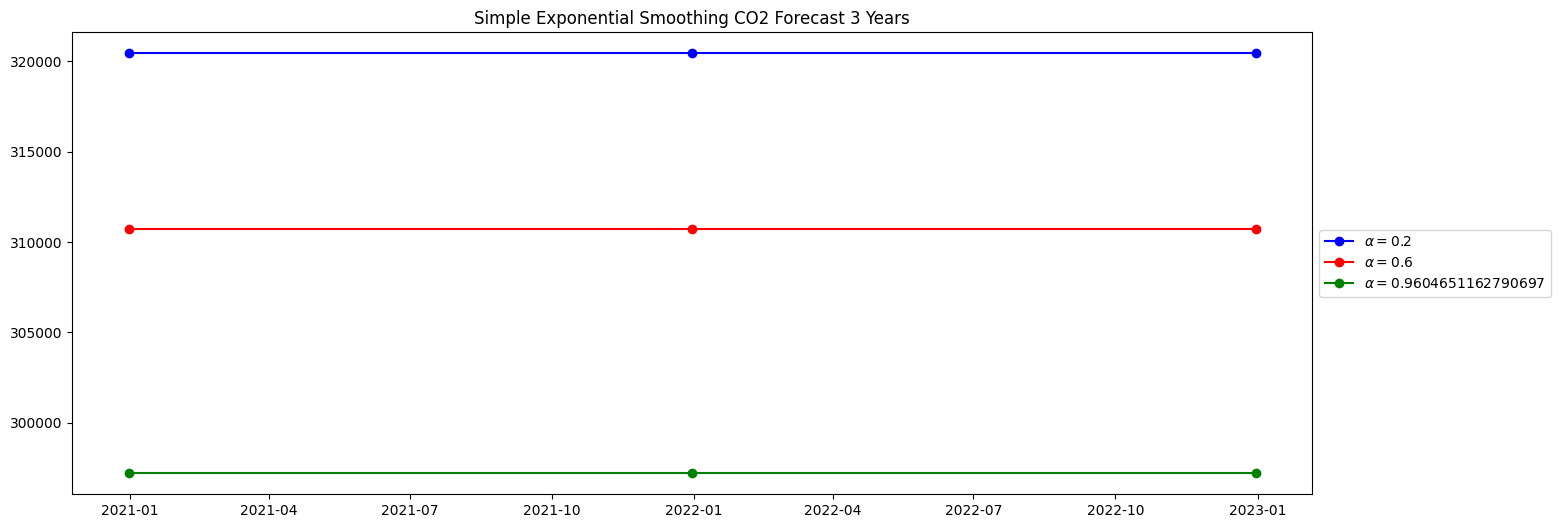

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CO2 Forecast 3 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


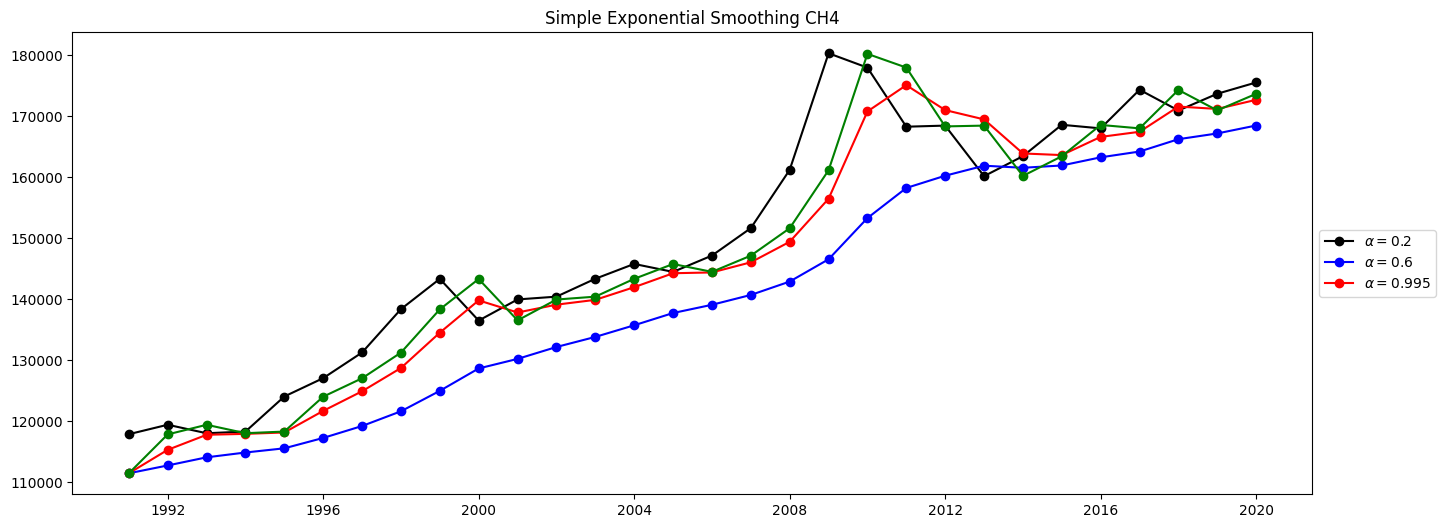

In [32]:
ts = ch4_ts

fit1 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.2, optimized=False
)

fit2 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.6, optimized=False
)

fit3 = SimpleExpSmoothing(ts, initialization_method='estimated').fit()

fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CH4")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

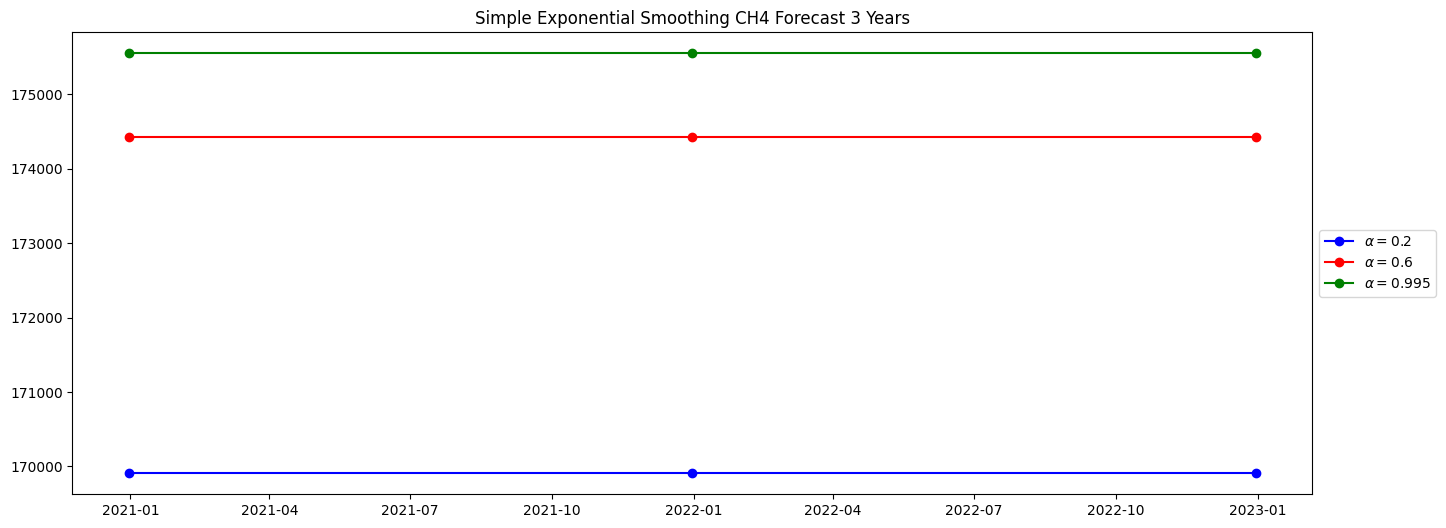

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CH4 Forecast 3 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

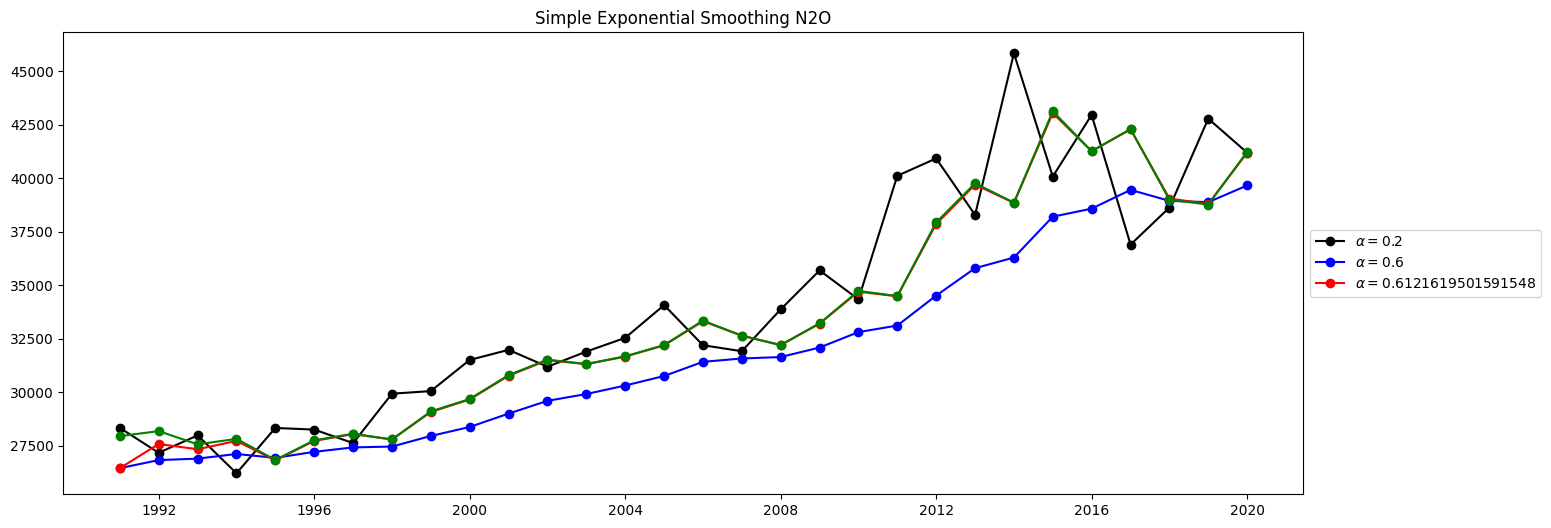

In [34]:
ts = n2o_ts

fit1 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.2, optimized=False
)

fit2 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.6, optimized=False
)

fit3 = SimpleExpSmoothing(ts, initialization_method='estimated').fit()

fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing N2O")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

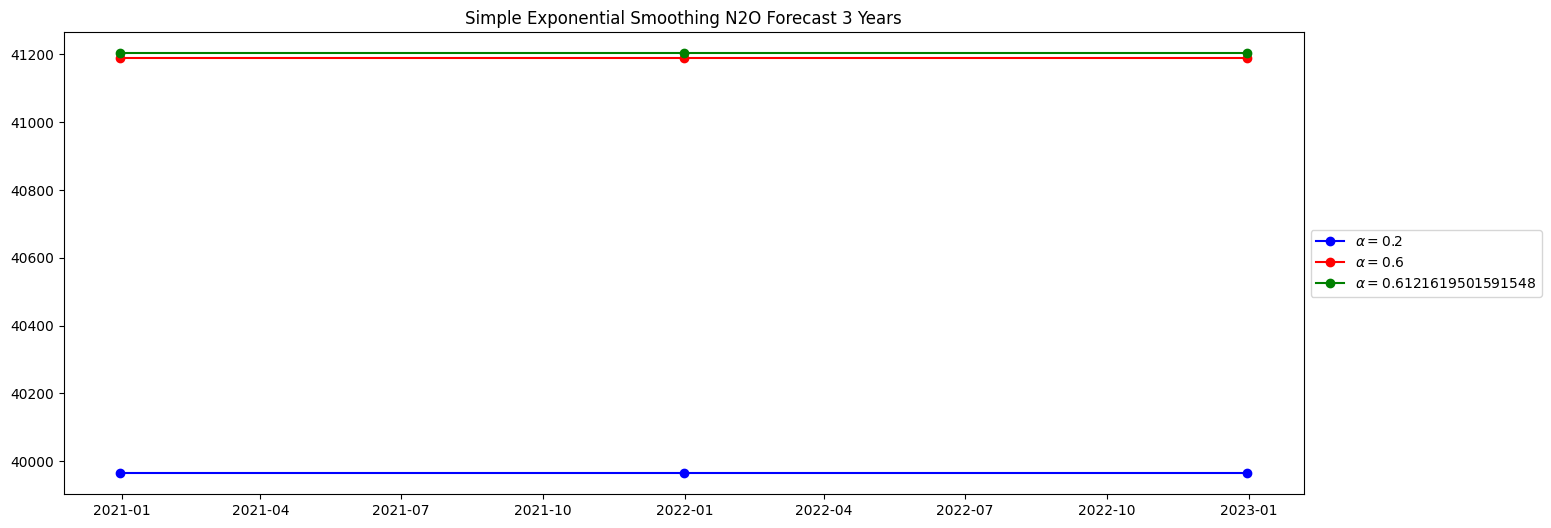

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing N2O Forecast 3 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


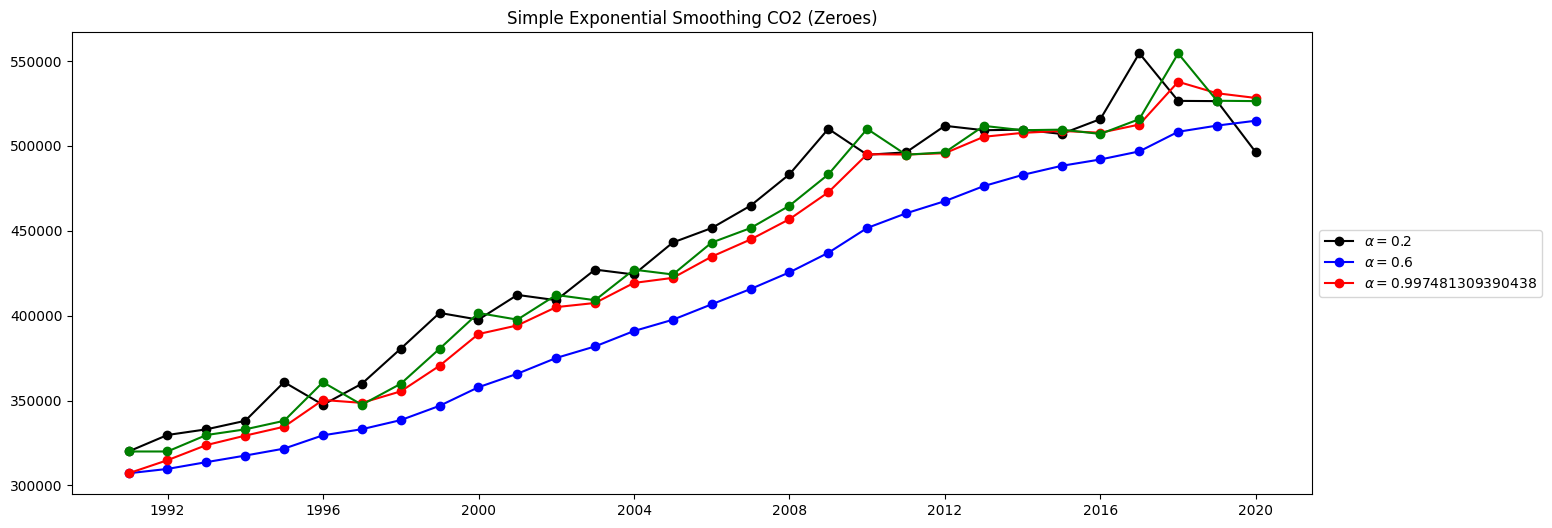

In [36]:
ts = co2_cero_ts

fit1 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.2, optimized=False
)

fit2 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.6, optimized=False
)

fit3 = SimpleExpSmoothing(ts, initialization_method='estimated').fit()

fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CO2 (Zeroes)")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

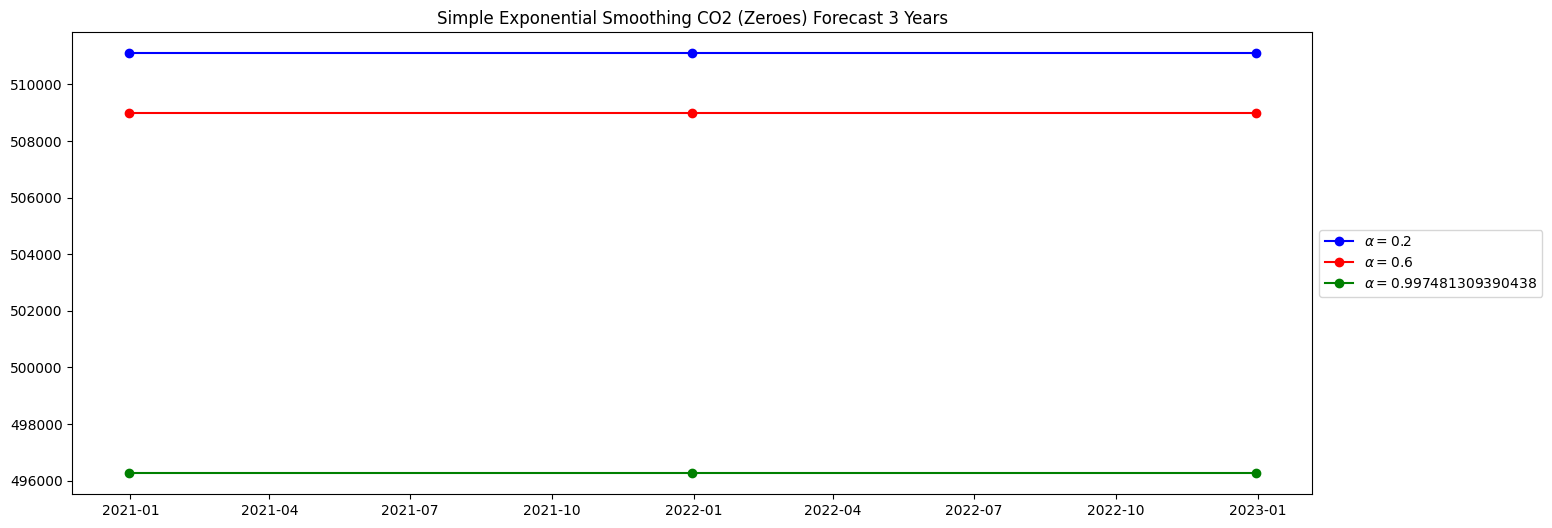

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CO2 (Zeroes) Forecast 3 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


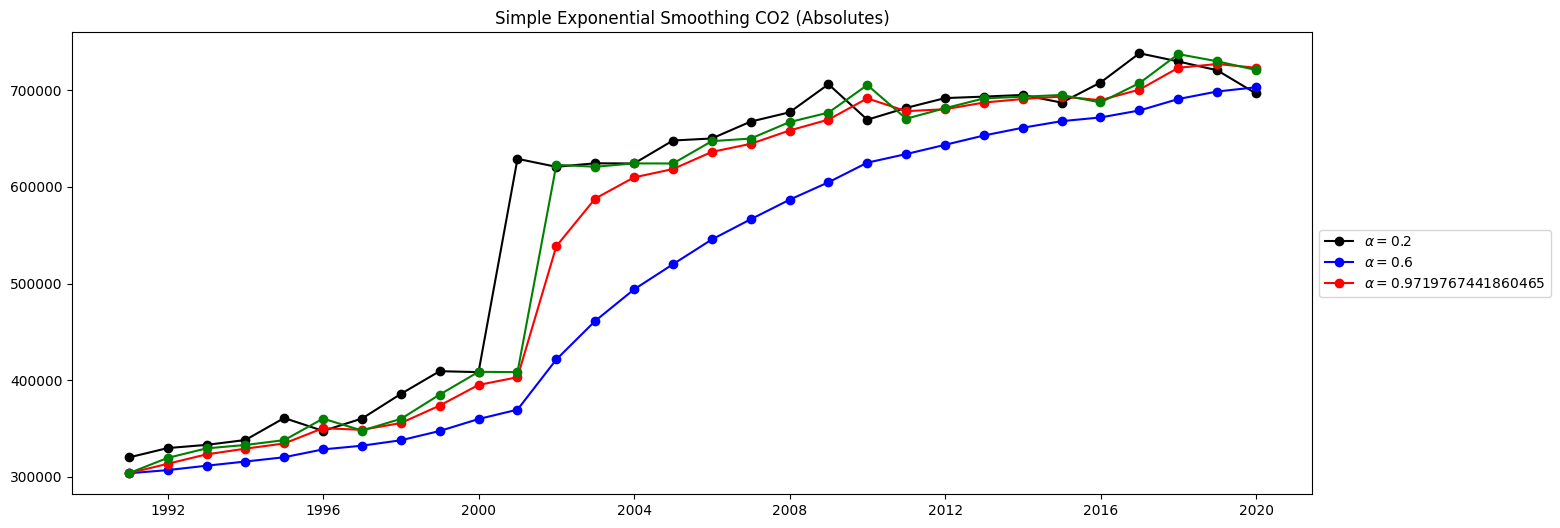

In [38]:
ts = co2_abs_ts

fit1 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.2, optimized=False
)

fit2 = SimpleExpSmoothing(ts, initialization_method='heuristic').fit(
    smoothing_level=0.6, optimized=False
)

fit3 = SimpleExpSmoothing(ts, initialization_method='estimated').fit()

fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CO2 (Absolutes)")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

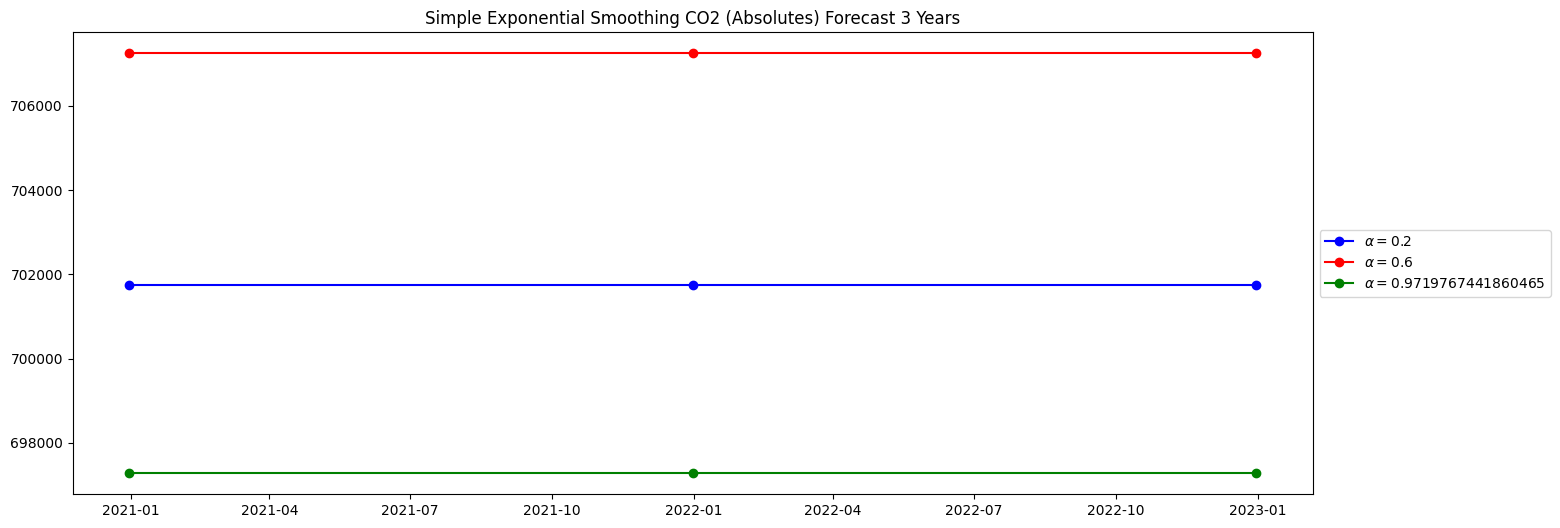

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Simple Exponential Smoothing CO2 (Absolutes) Forecast 3 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

# Suavizado Exponencial Doble

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


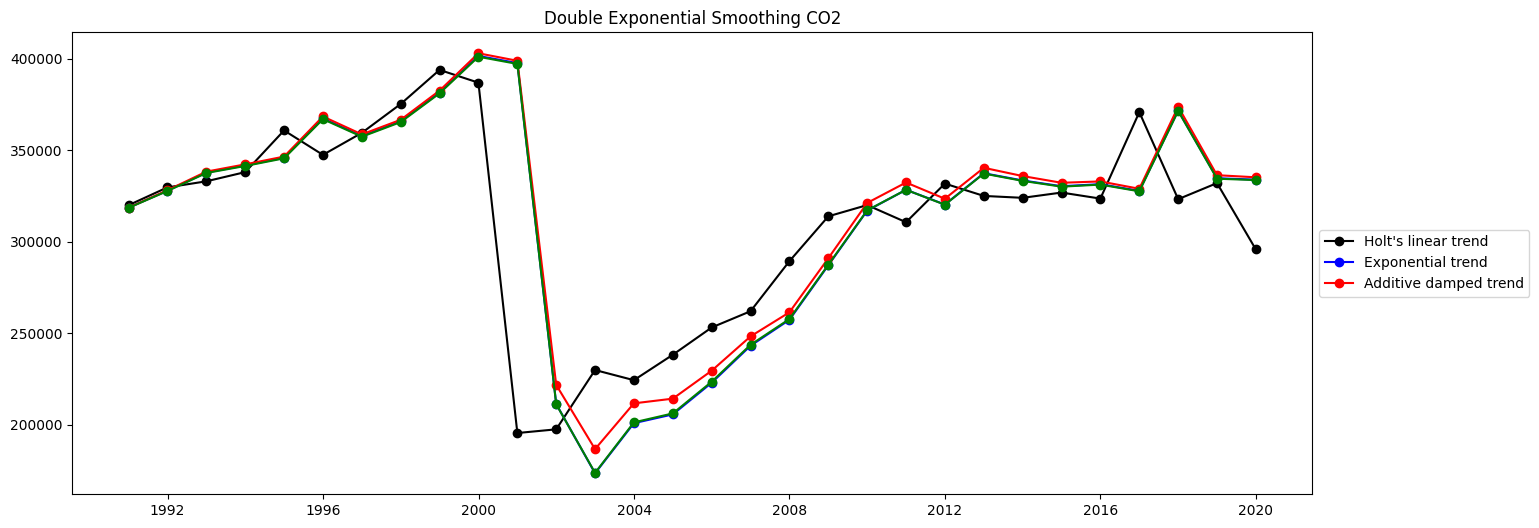

In [40]:
ts = co2_ts

fit1 = Holt(ts, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit2 = Holt(ts, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit3 = Holt(ts, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)

fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fcast2 = fit2.forecast(5).rename("Exponential trend")

fcast3 = fit3.forecast(5).rename("Additive damped trend")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CO2")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

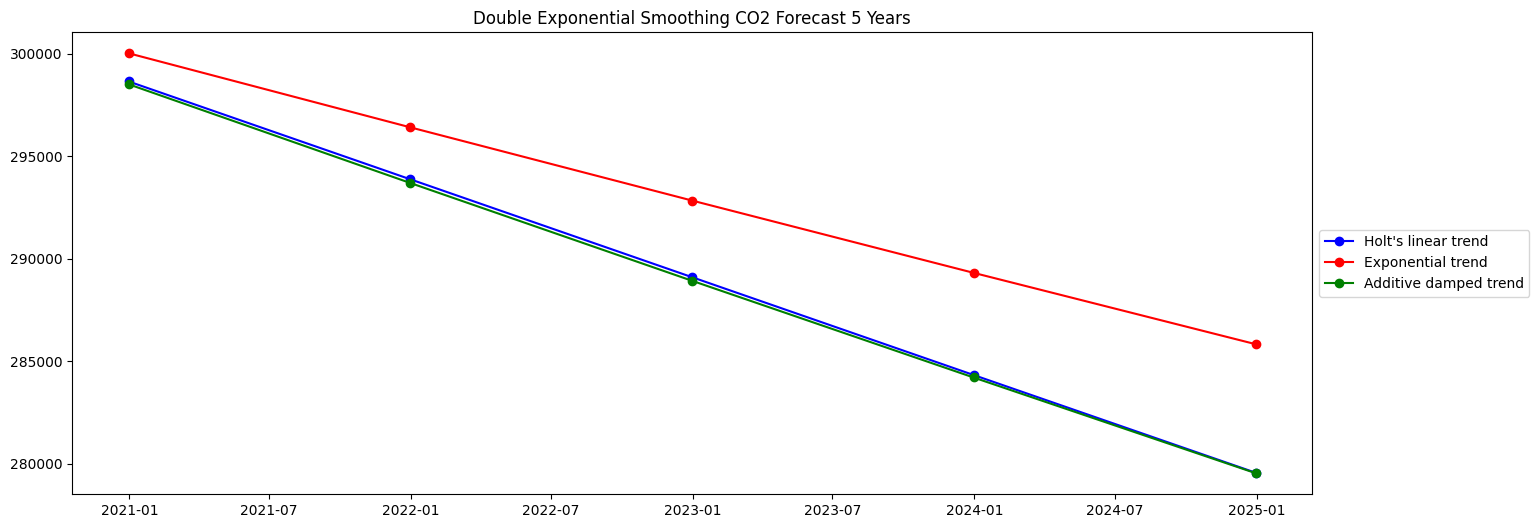

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CO2 Forecast 5 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


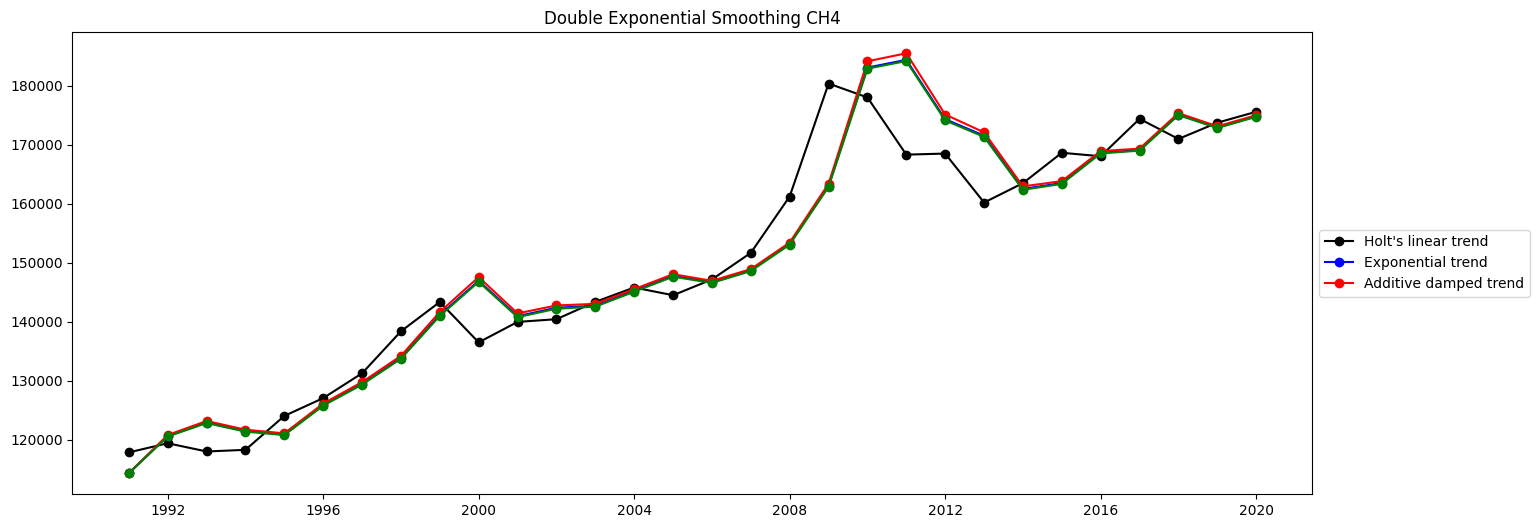

In [42]:
ts = ch4_ts

fit1 = Holt(ts, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit2 = Holt(ts, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit3 = Holt(ts, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)

fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fcast2 = fit2.forecast(5).rename("Exponential trend")

fcast3 = fit3.forecast(5).rename("Additive damped trend")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CH4")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

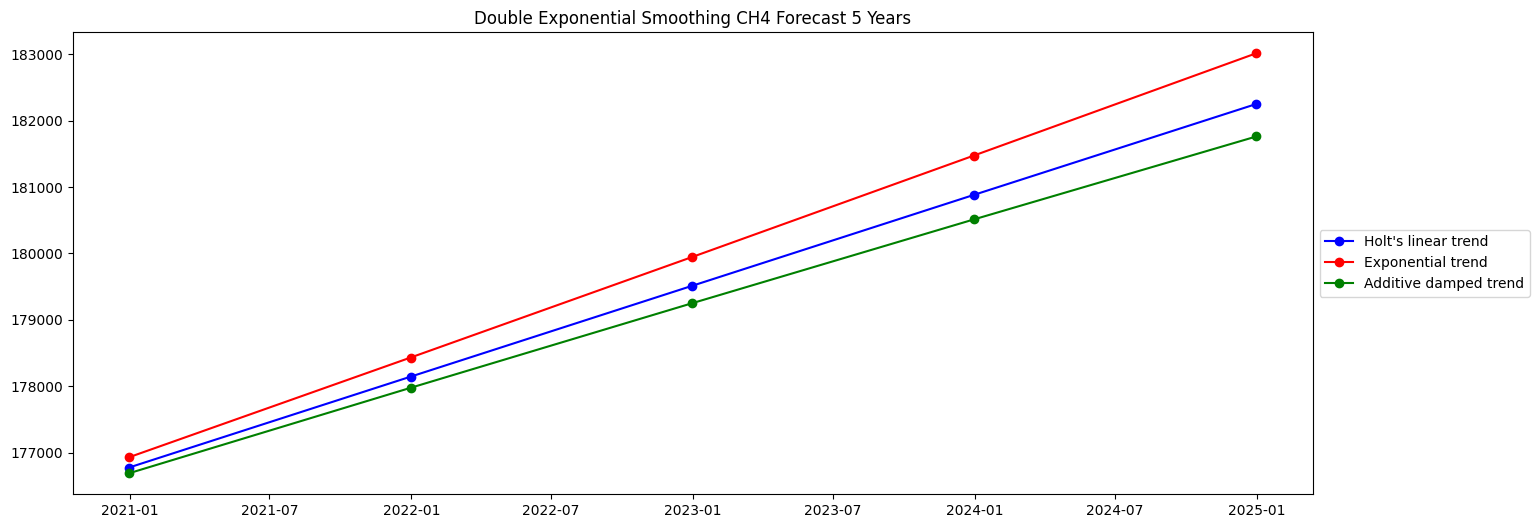

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CH4 Forecast 5 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

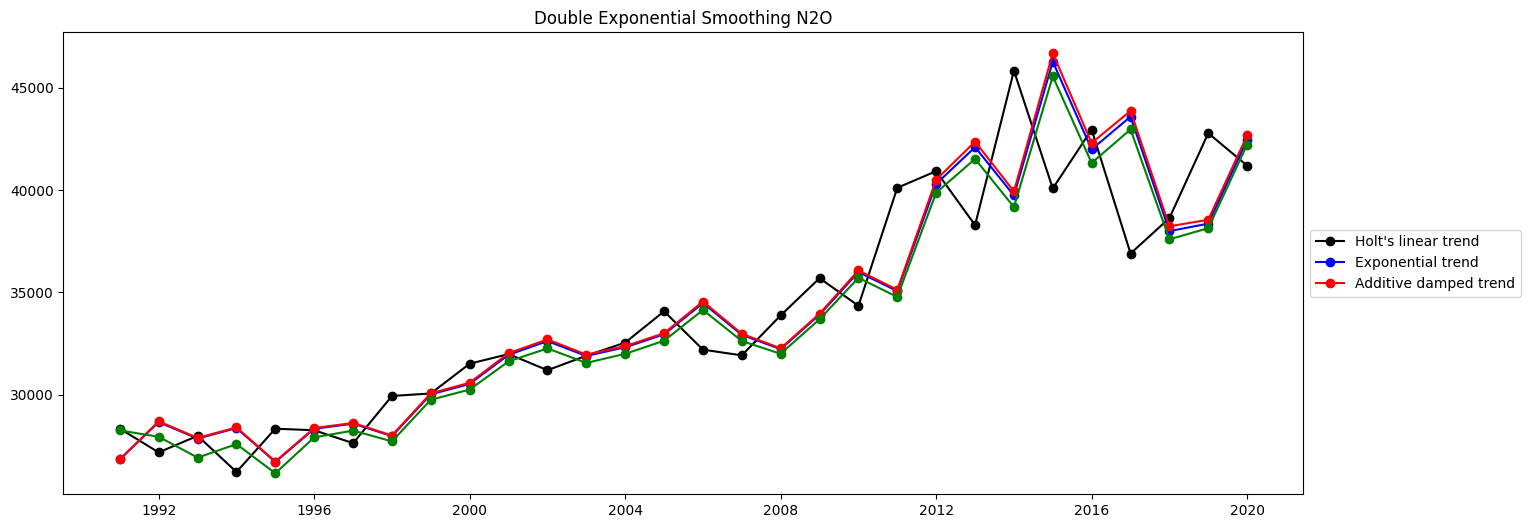

In [44]:
ts = n2o_ts

fit1 = Holt(ts, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit2 = Holt(ts, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit3 = Holt(ts, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)

fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fcast2 = fit2.forecast(5).rename("Exponential trend")

fcast3 = fit3.forecast(5).rename("Additive damped trend")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Double Exponential Smoothing N2O")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

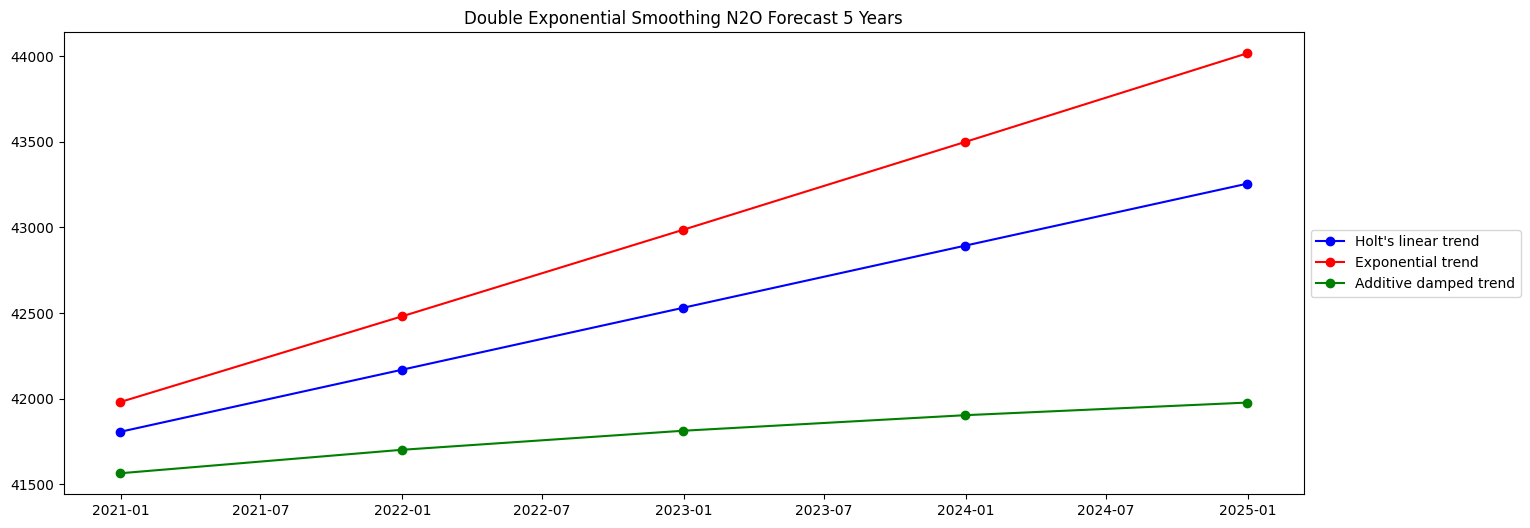

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Double Exponential Smoothing N2O Forecast 5 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


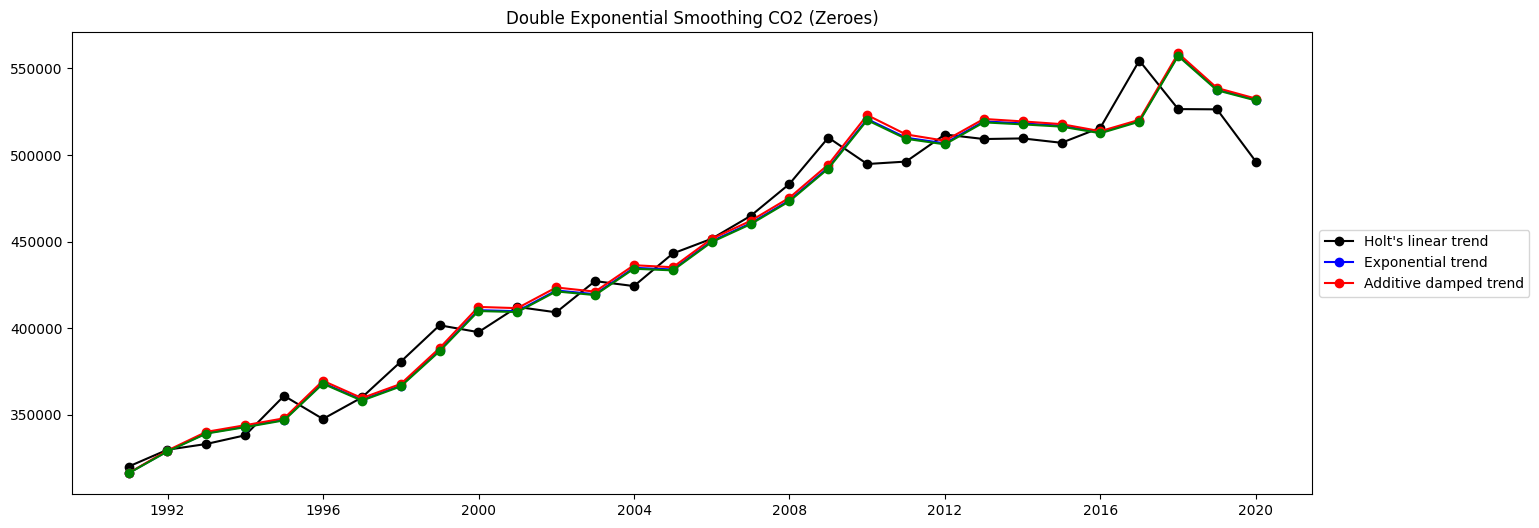

In [46]:
ts = co2_cero_ts

fit1 = Holt(ts, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit2 = Holt(ts, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit3 = Holt(ts, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)

fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fcast2 = fit2.forecast(5).rename("Exponential trend")

fcast3 = fit3.forecast(5).rename("Additive damped trend")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CO2 (Zeroes)")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

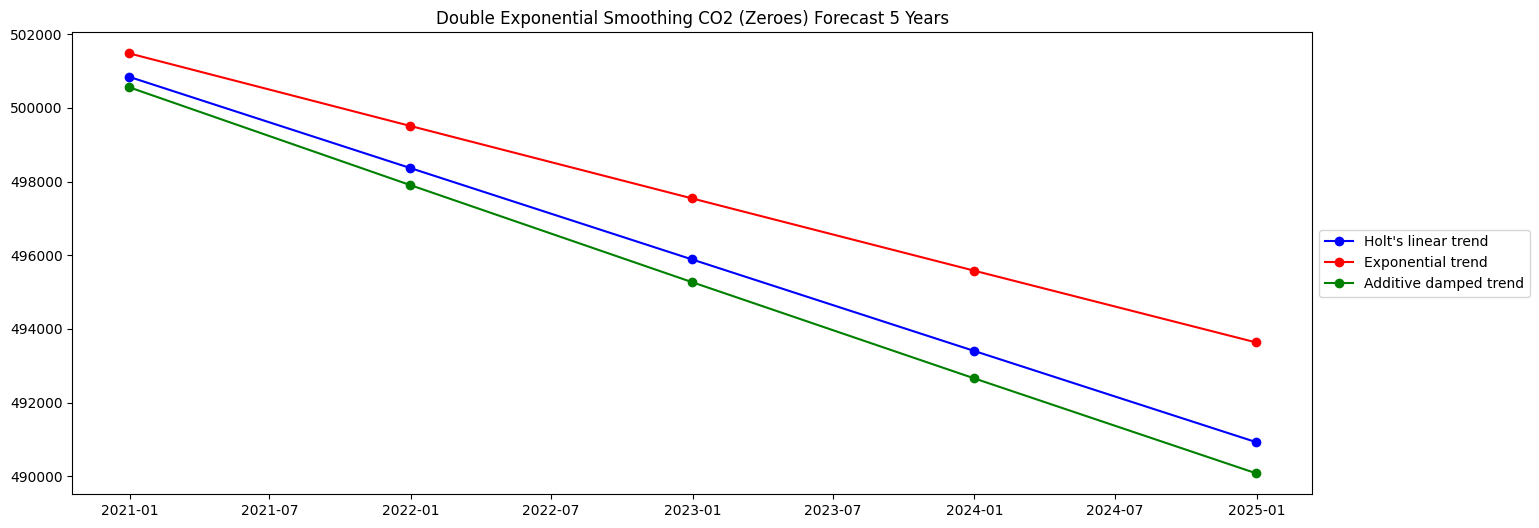

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CO2 (Zeroes) Forecast 5 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


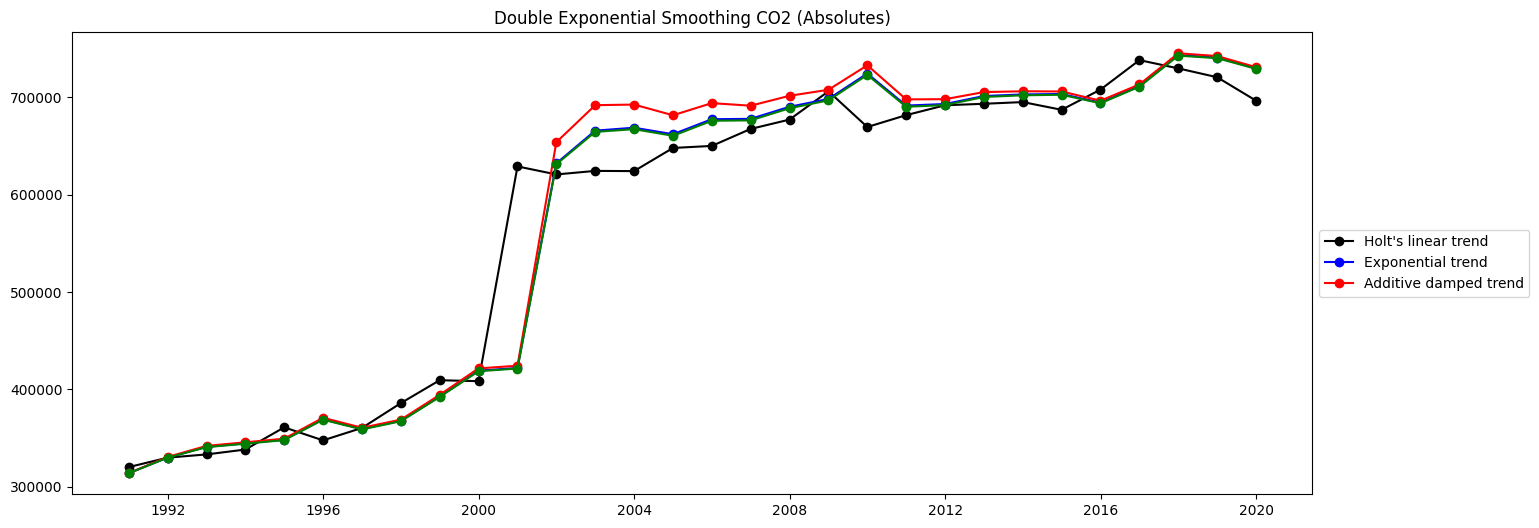

In [48]:
ts = co2_abs_ts

fit1 = Holt(ts, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit2 = Holt(ts, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

fit3 = Holt(ts, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)

fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fcast2 = fit2.forecast(5).rename("Exponential trend")

fcast3 = fit3.forecast(5).rename("Additive damped trend")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CO2 (Absolutes)")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

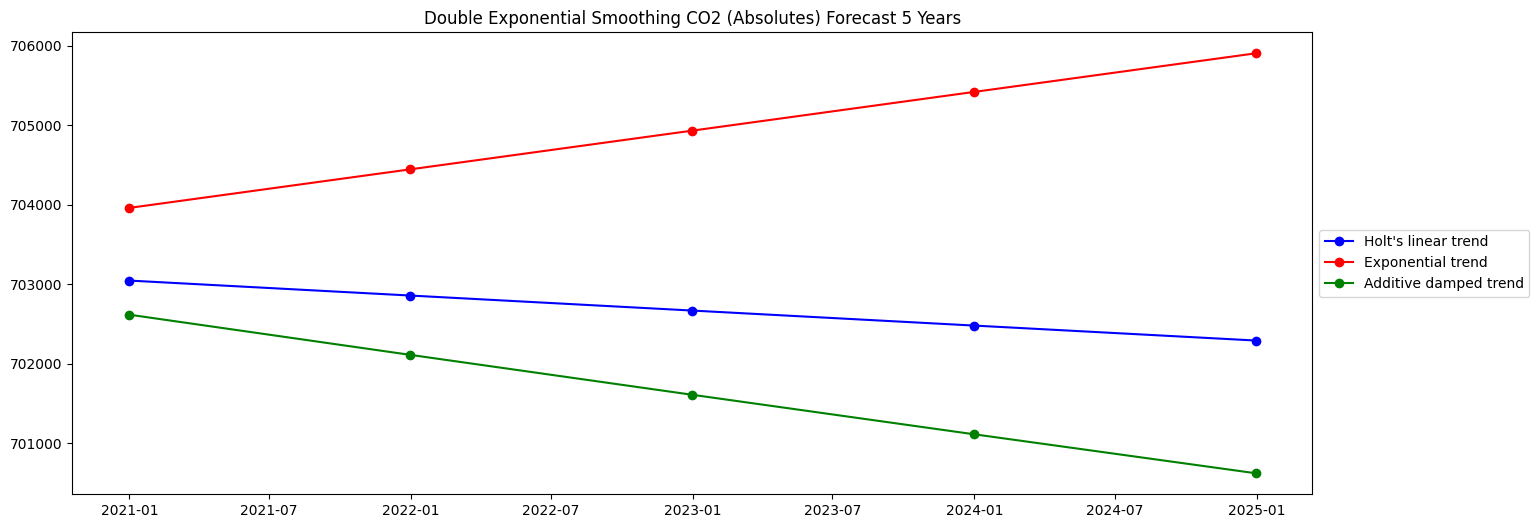

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")

ax.set_title("Double Exponential Smoothing CO2 (Absolutes) Forecast 5 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name], loc='center left', bbox_to_anchor=(1, 0.5))

# Suavizado Exponencial Triple

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  9.242857e-01    8.535714e-01  9.242857e-01    8.535714e-01
$\beta$   1.000000e-04    1.000000e-04  1.000000e-04    1.000000e-04
$\phi$             NaN             NaN  9.900000e-01    9.900000e-01
$\gamma$  1.081633e-02    6.655844e-02  1.081633e-02    6.655844e-02
$l_0$     4.615576e+14    4.615576e+14  4.615576e+14    4.615576e+14
$b_0$    -1.642797e+13   -1.642797e+13 -1.642797e+13   -1.642797e+13
SSE       7.262485e+10    5.382895e+10  7.083105e+10    5.317338e+10

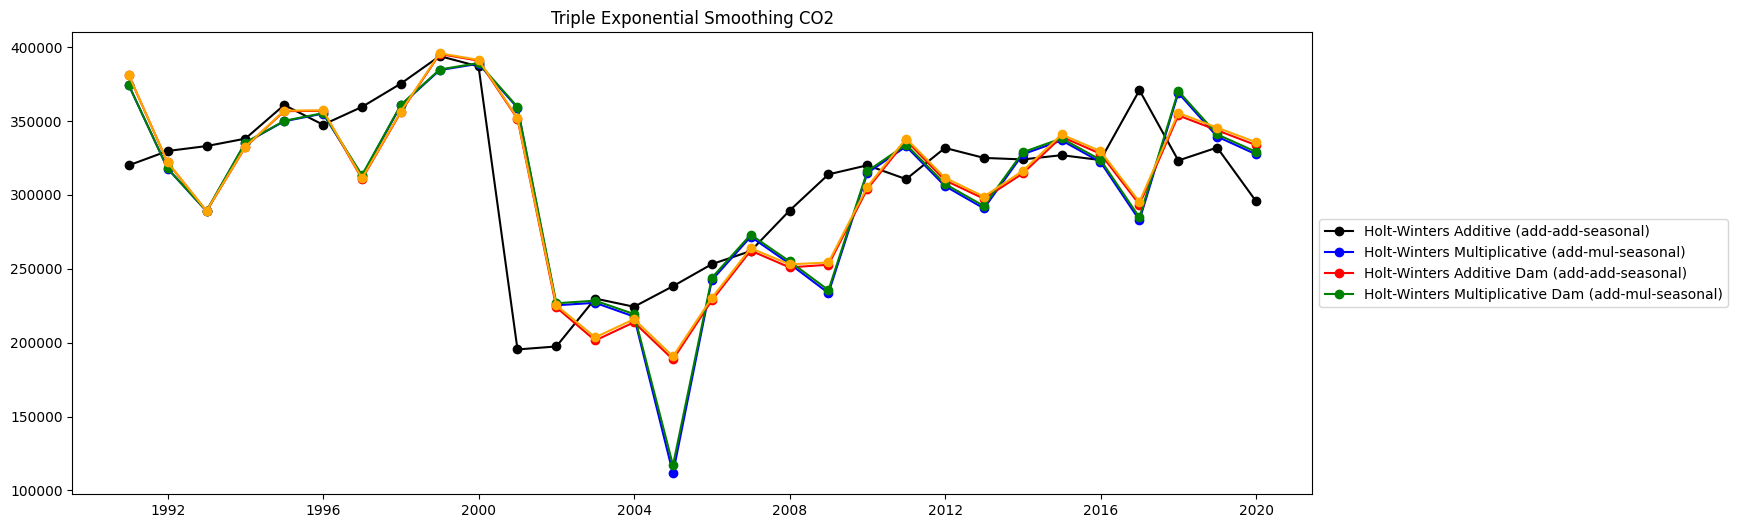

In [50]:
ts = co2_ts

fit1 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

fcast1 = fit1.forecast(8).rename("Holt-Winters Additive (add-add-seasonal)")
fcast2 = fit2.forecast(8).rename("Holt-Winters Multiplicative (add-mul-seasonal)")
fcast3 = fit3.forecast(8).rename("Holt-Winters Additive Dam (add-add-seasonal)")
fcast4 = fit4.forecast(8).rename("Holt-Winters Multiplicative Dam (add-mul-seasonal)")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")
ax.plot(fit4.fittedvalues, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CO2")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

results

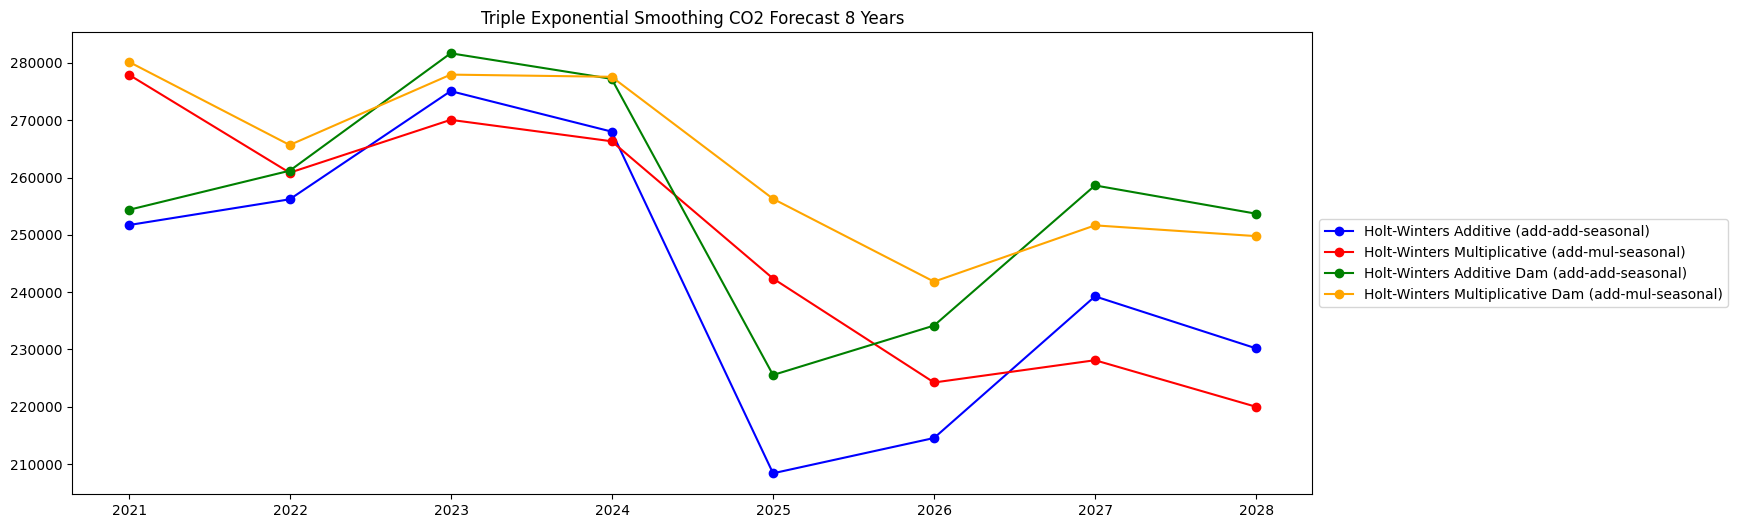

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")
ax.plot(fcast4, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CO2 Forecast 8 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  9.950000e-01    9.950000e-01  9.950000e-01    9.950000e-01
$\beta$   1.000000e-04    1.000000e-04  1.000000e-04    1.000000e-04
$\phi$             NaN             NaN  9.900000e-01    9.900000e-01
$\gamma$  1.000000e-04    1.000000e-04  1.000000e-04    1.000000e-04
$l_0$     1.041827e+07    1.041827e+07  1.041827e+07    1.041827e+07
$b_0$     3.606769e+05    3.606769e+05  3.606769e+05    3.606769e+05
SSE       8.723805e+08    8.977663e+08  8.638408e+08    8.890792e+08

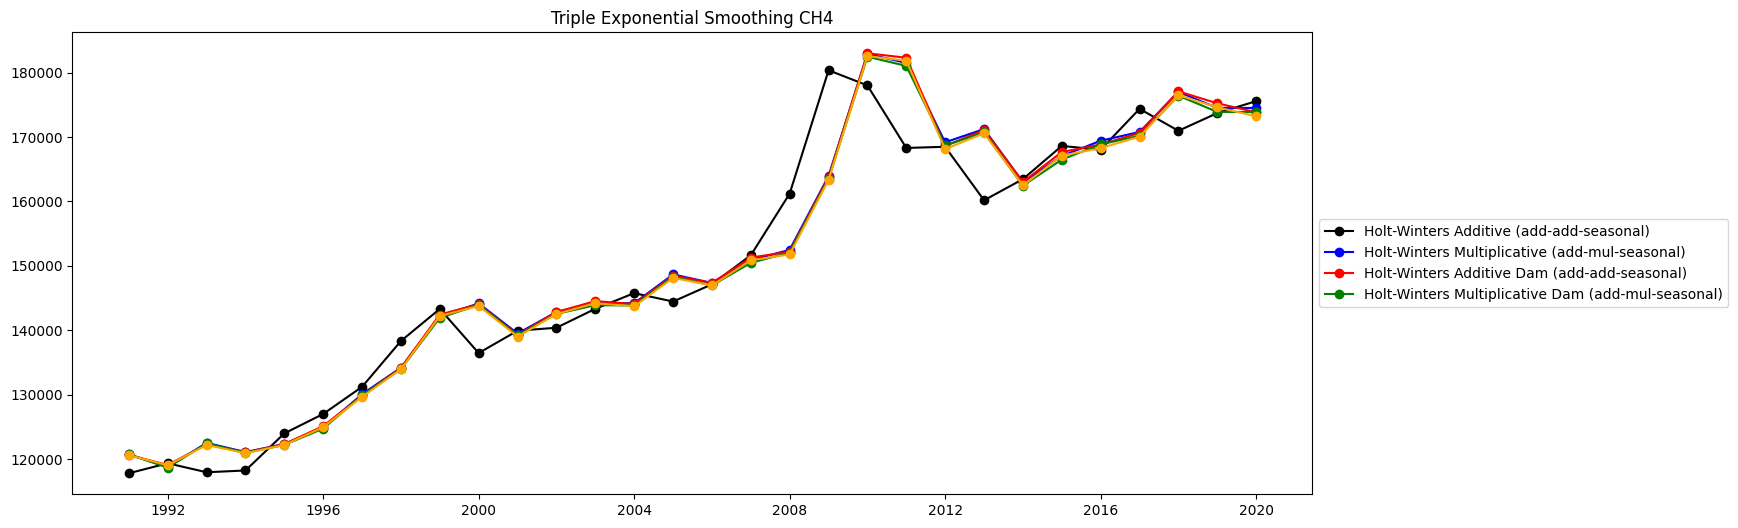

In [52]:
ts = ch4_ts

fit1 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

fcast1 = fit1.forecast(8).rename("Holt-Winters Additive (add-add-seasonal)")
fcast2 = fit2.forecast(8).rename("Holt-Winters Multiplicative (add-mul-seasonal)")
fcast3 = fit3.forecast(8).rename("Holt-Winters Additive Dam (add-add-seasonal)")
fcast4 = fit4.forecast(8).rename("Holt-Winters Multiplicative Dam (add-mul-seasonal)")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")
ax.plot(fit4.fittedvalues, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CH4")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

results

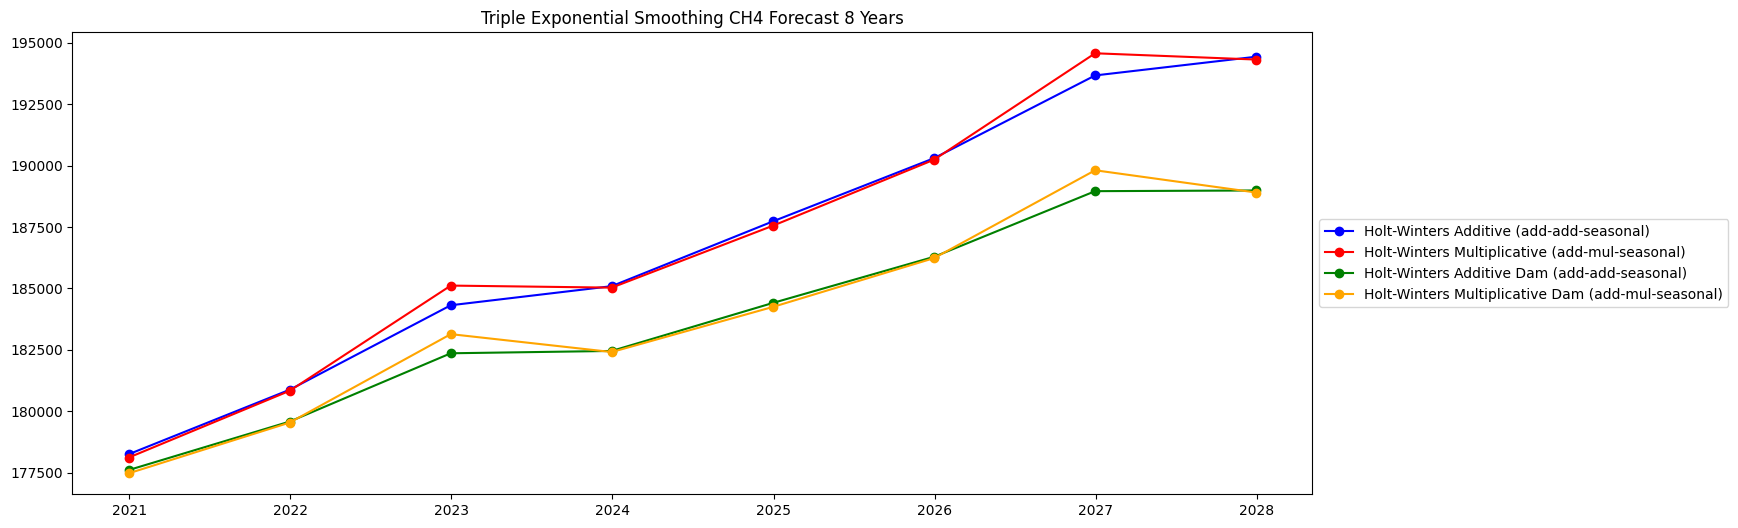

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")
ax.plot(fcast4, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CH4 Forecast 8 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  3.585714e-01    3.585714e-01  7.571429e-02    7.571429e-02
$\beta$   2.109244e-02    2.109244e-02  7.571429e-02    7.571429e-02
$\phi$             NaN             NaN  9.900000e-01    9.900000e-01
$\gamma$  1.000000e-04    1.000000e-04  1.000000e-04    1.000000e-04
$l_0$     9.969679e-01    9.969679e-01  9.969679e-01    9.969679e-01
$b_0$     6.153545e-07    6.153545e-07  6.153545e-07    6.153545e-07
SSE       1.829761e+08    1.829763e+08  1.591217e+08    1.591218e+08

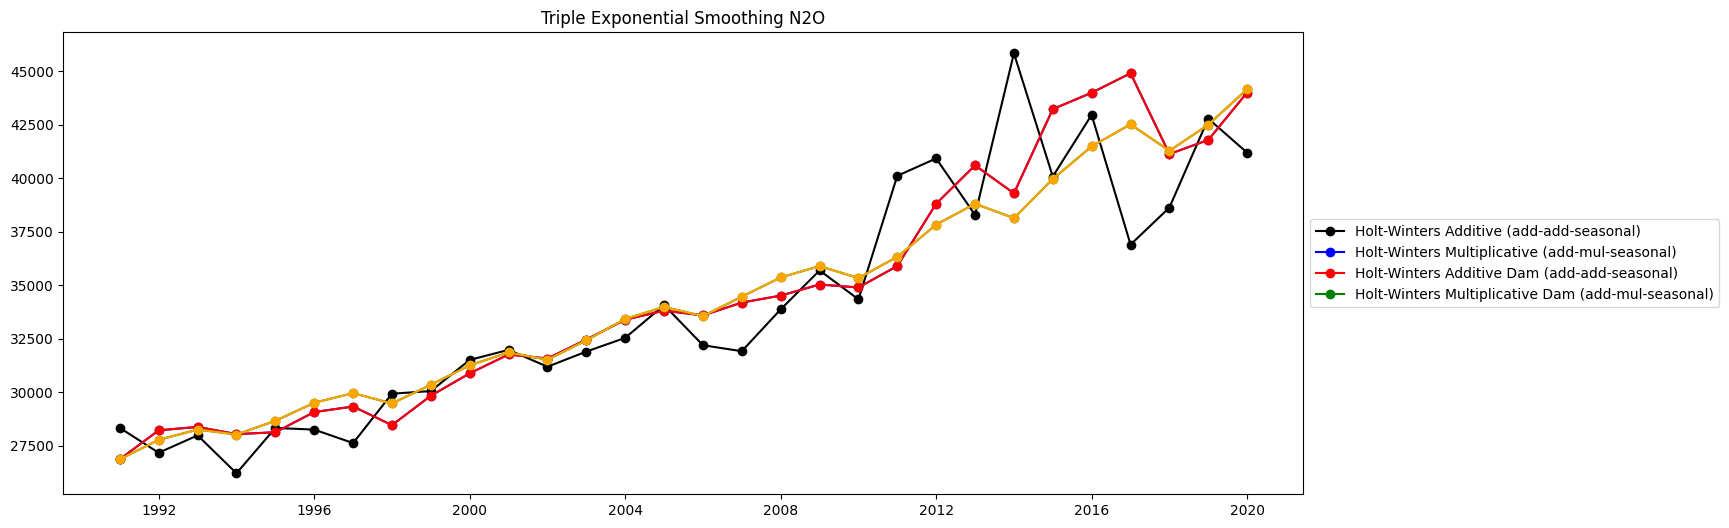

In [54]:
ts = n2o_ts

fit1 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

fcast1 = fit1.forecast(8).rename("Holt-Winters Additive (add-add-seasonal)")
fcast2 = fit2.forecast(8).rename("Holt-Winters Multiplicative (add-mul-seasonal)")
fcast3 = fit3.forecast(8).rename("Holt-Winters Additive Dam (add-add-seasonal)")
fcast4 = fit4.forecast(8).rename("Holt-Winters Multiplicative Dam (add-mul-seasonal)")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")
ax.plot(fit4.fittedvalues, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing N2O")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

results

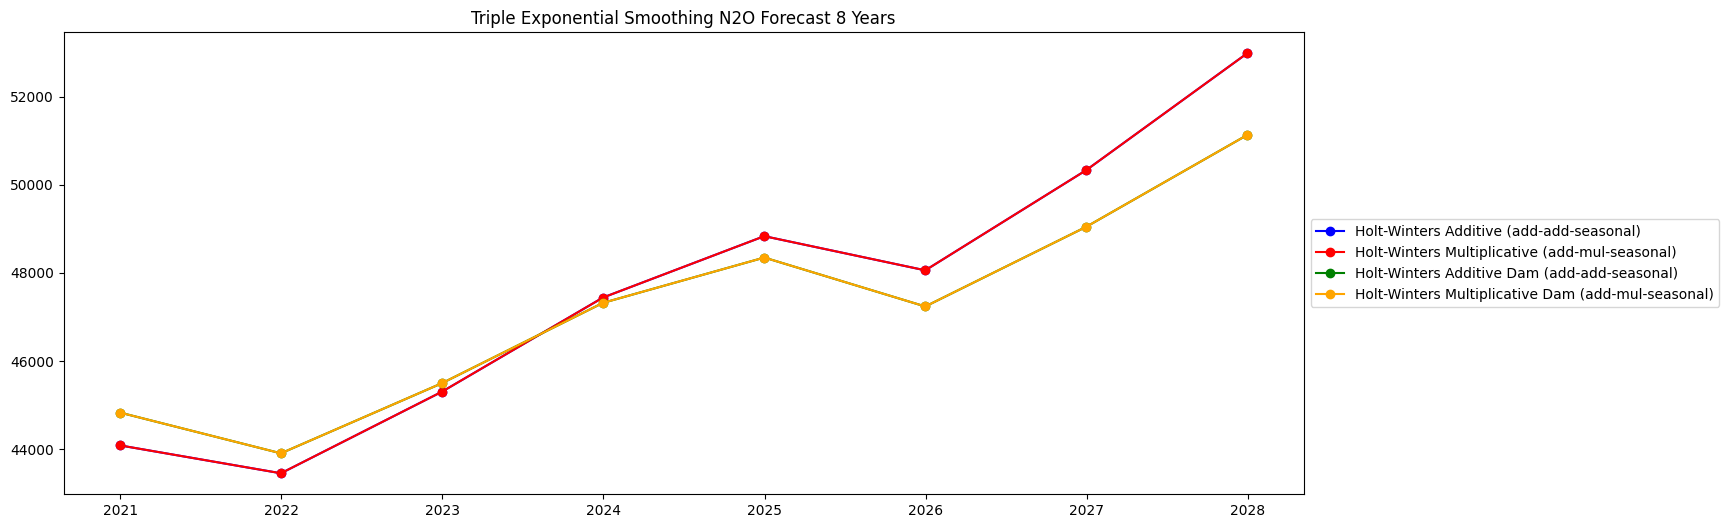

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")
ax.plot(fcast4, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing N2O Forecast 8 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  9.242857e-01    9.242857e-01  8.535714e-01    4.646429e-01
$\beta$   1.000000e-04    1.000000e-04  1.000000e-04    1.000000e-04
$\phi$             NaN             NaN  9.900000e-01    9.900000e-01
$\gamma$  1.000000e-04    3.244898e-02  1.000000e-04    2.294388e-01
$l_0$     2.960618e+09    2.960618e+09  2.960618e+09    2.960618e+09
$b_0$     1.734970e+08    1.734970e+08  1.734970e+08    1.734970e+08
SSE       6.124256e+09    6.673504e+09  5.915768e+09    6.513432e+09

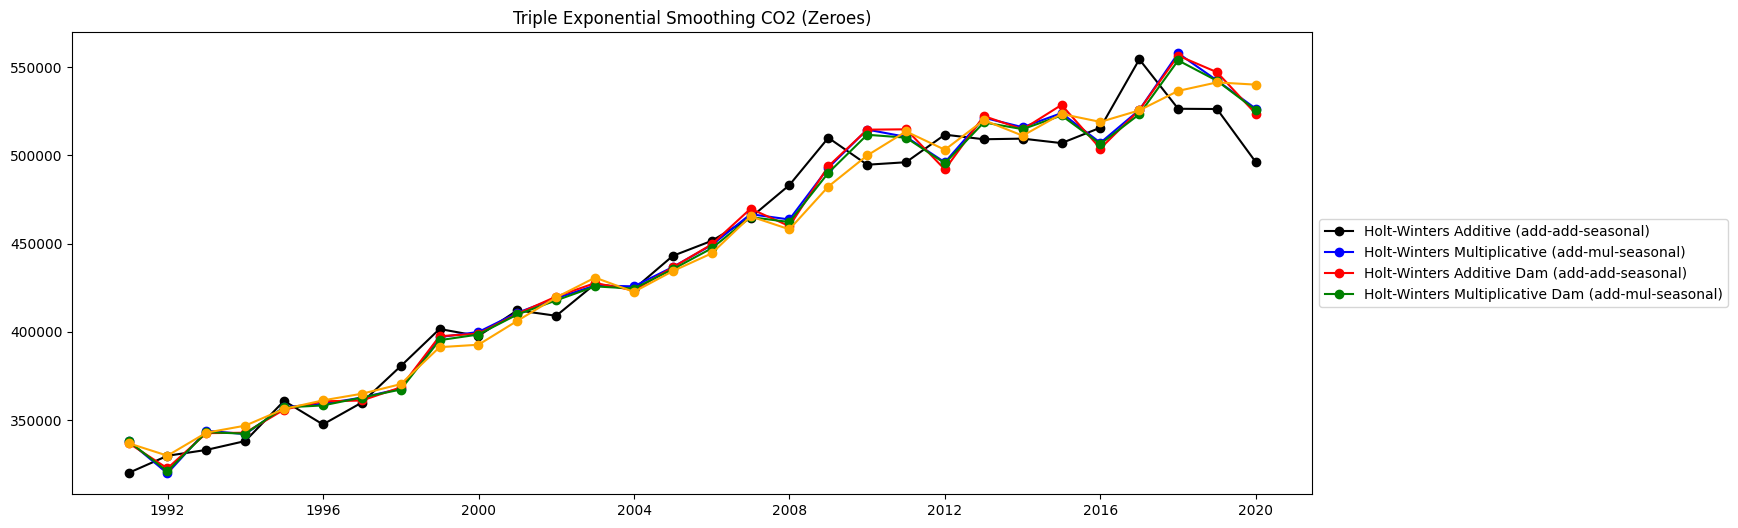

In [56]:
ts = co2_cero_ts

fit1 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

fcast1 = fit1.forecast(8).rename("Holt-Winters Additive (add-add-seasonal)")
fcast2 = fit2.forecast(8).rename("Holt-Winters Multiplicative (add-mul-seasonal)")
fcast3 = fit3.forecast(8).rename("Holt-Winters Additive Dam (add-add-seasonal)")
fcast4 = fit4.forecast(8).rename("Holt-Winters Multiplicative Dam (add-mul-seasonal)")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")
ax.plot(fit4.fittedvalues, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CO2 (Zeroes)")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

results

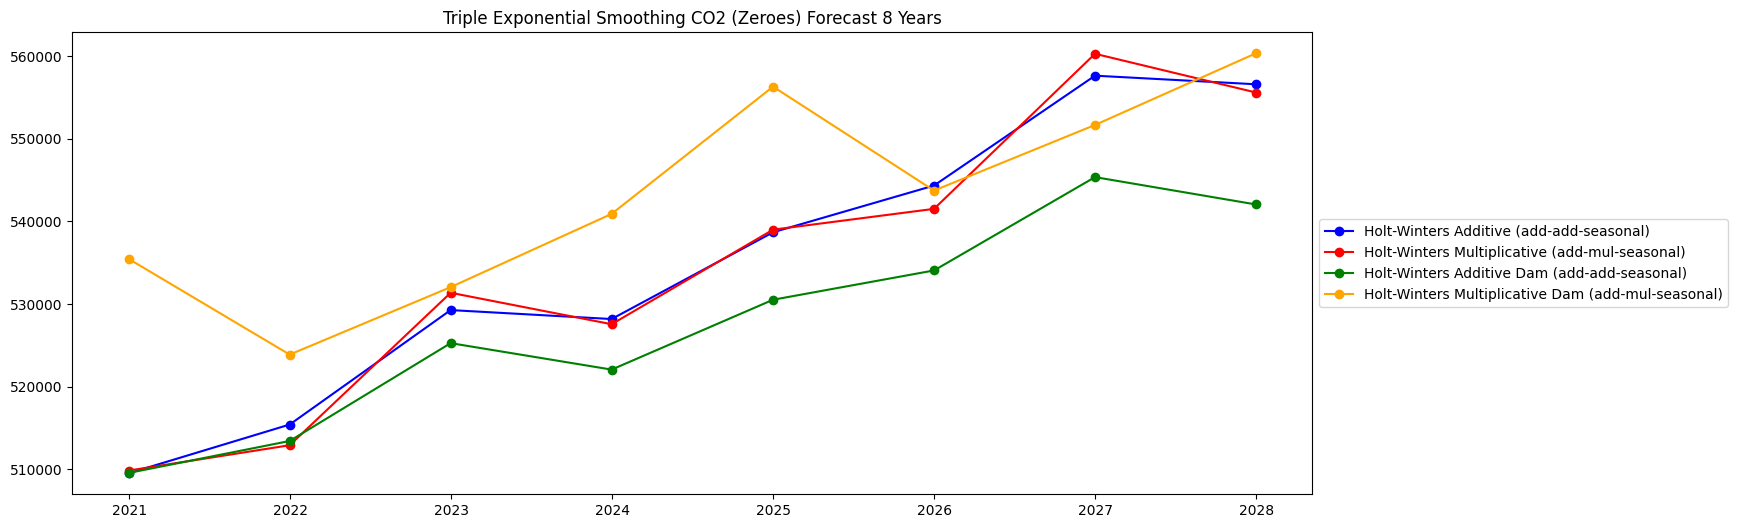

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")
ax.plot(fcast4, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CO2 (Zeroes) Forecast 8 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  9.596429e-01    7.121429e-01  9.242857e-01    6.767857e-01
$\beta$   3.427296e-02    2.967262e-02  1.000000e-04    1.000000e-04
$\phi$             NaN             NaN  9.900000e-01    9.900000e-01
$\gamma$  1.000000e-04    1.000000e-04  1.000000e-04    1.000000e-04
$l_0$    -5.627206e+12    1.000000e-02 -5.627206e+12    1.000000e-02
$b_0$     3.290695e+13    3.290695e+13  3.290695e+13    3.290695e+13
SSE       6.092635e+10    6.237646e+10  5.974050e+10    6.115267e+10

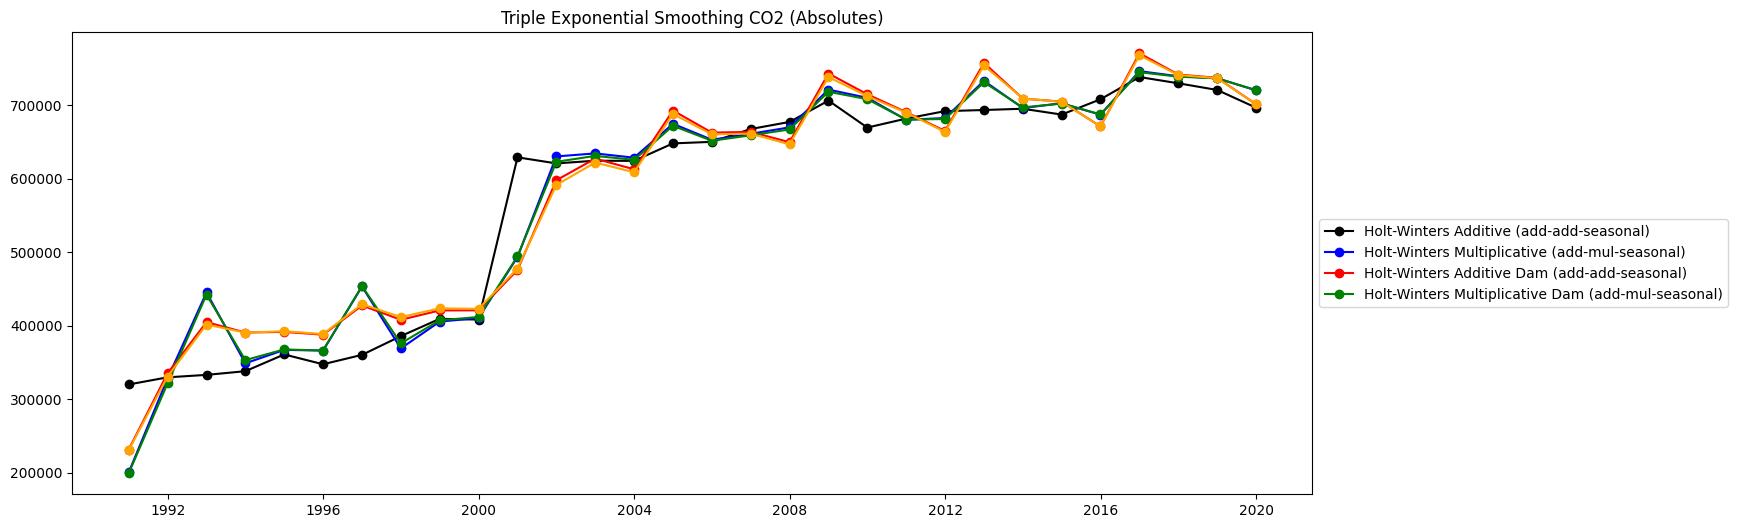

In [58]:
ts = co2_abs_ts

fit1 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    ts,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

fcast1 = fit1.forecast(8).rename("Holt-Winters Additive (add-add-seasonal)")
fcast2 = fit2.forecast(8).rename("Holt-Winters Multiplicative (add-mul-seasonal)")
fcast3 = fit3.forecast(8).rename("Holt-Winters Additive Dam (add-add-seasonal)")
fcast4 = fit4.forecast(8).rename("Holt-Winters Multiplicative Dam (add-mul-seasonal)")

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(ts, marker="o", color="black")
ax.plot(fit1.fittedvalues, marker="o", color="blue")
ax.plot(fit2.fittedvalues, marker="o", color="red")
ax.plot(fit3.fittedvalues, marker="o", color="green")
ax.plot(fit4.fittedvalues, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CO2 (Absolutes)")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))

results

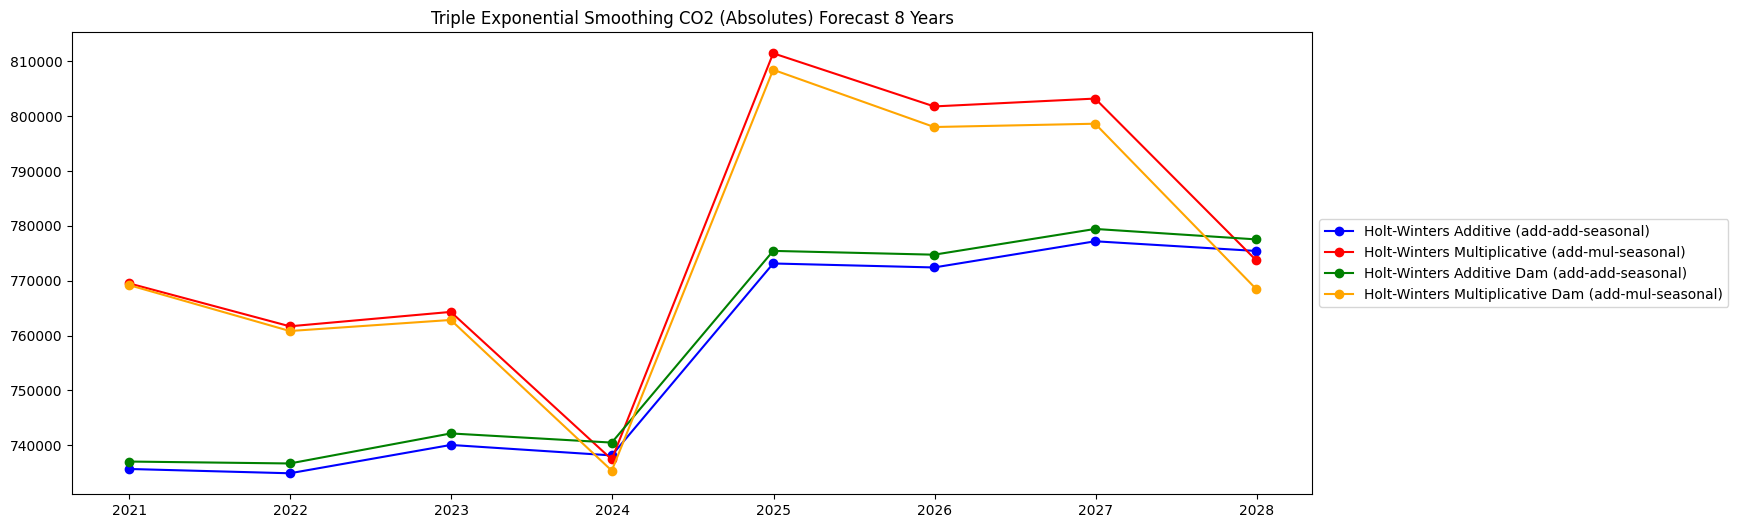

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(fcast1, marker="o", color="blue")
ax.plot(fcast2, marker="o", color="red")
ax.plot(fcast3, marker="o", color="green")
ax.plot(fcast4, marker="o", color="orange")

ax.set_title("Triple Exponential Smoothing CO2 (Absolutes) Forecast 8 Years")
ax.legend([fcast1.name, fcast2.name, fcast3.name, fcast4.name], loc='center left', bbox_to_anchor=(1, 0.5))